# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 9.2

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

In [ ]:
!wget  -O 'gradient_proof' -q 'https://www.dropbox.com/scl/fi/qrafuk4mzjoauqh7jg3pc/.jpg?rlkey=b05g9nep3fyhf5p6yyfnutgst&st=21x9mdjs&dl=0'

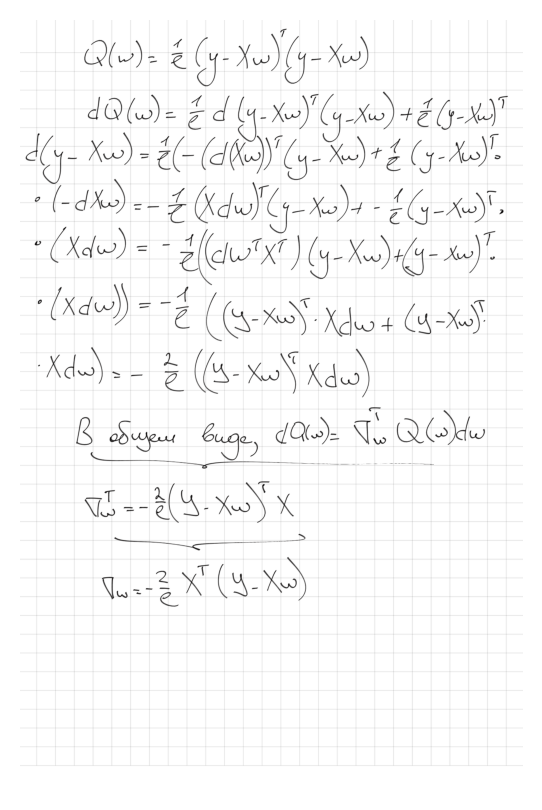

In [ ]:
from PIL import Image

image_path = '/content/gradient_proof'
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [ ]:
!wget  -O 'descents.py' -q 'https://www.dropbox.com/scl/fi/6ok0h17borpp0e5lp8f1f/descents.py?rlkey=t695nrk80s5m33edbyuz4bu72&st=mczgqskf&dl=0'

In [ ]:
!wget  -O 'linear_regression.py' -q 'https://www.dropbox.com/scl/fi/2kz9qdfr72qhbavc4m3zf/linear_regression.py?rlkey=b98itlbb79wyv9dz26redibye&st=oka2tqmc&dl=0'

In [ ]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [ ]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [ ]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [ ]:
import numpy as np
%pylab inline
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['gradient', 'xticks', 'diff']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
!wget  -O 'autos.csv' -q 'https://www.dropbox.com/scl/fi/wnqg10qzt42dbw69a4r4z/autos.csv?rlkey=clqcqx38i2zbs0k5whyv16og4&st=98g8ohzn&dl=0'

In [ ]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [ ]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# your code
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

Text(0, 0.5, 'Counter of prices\n')

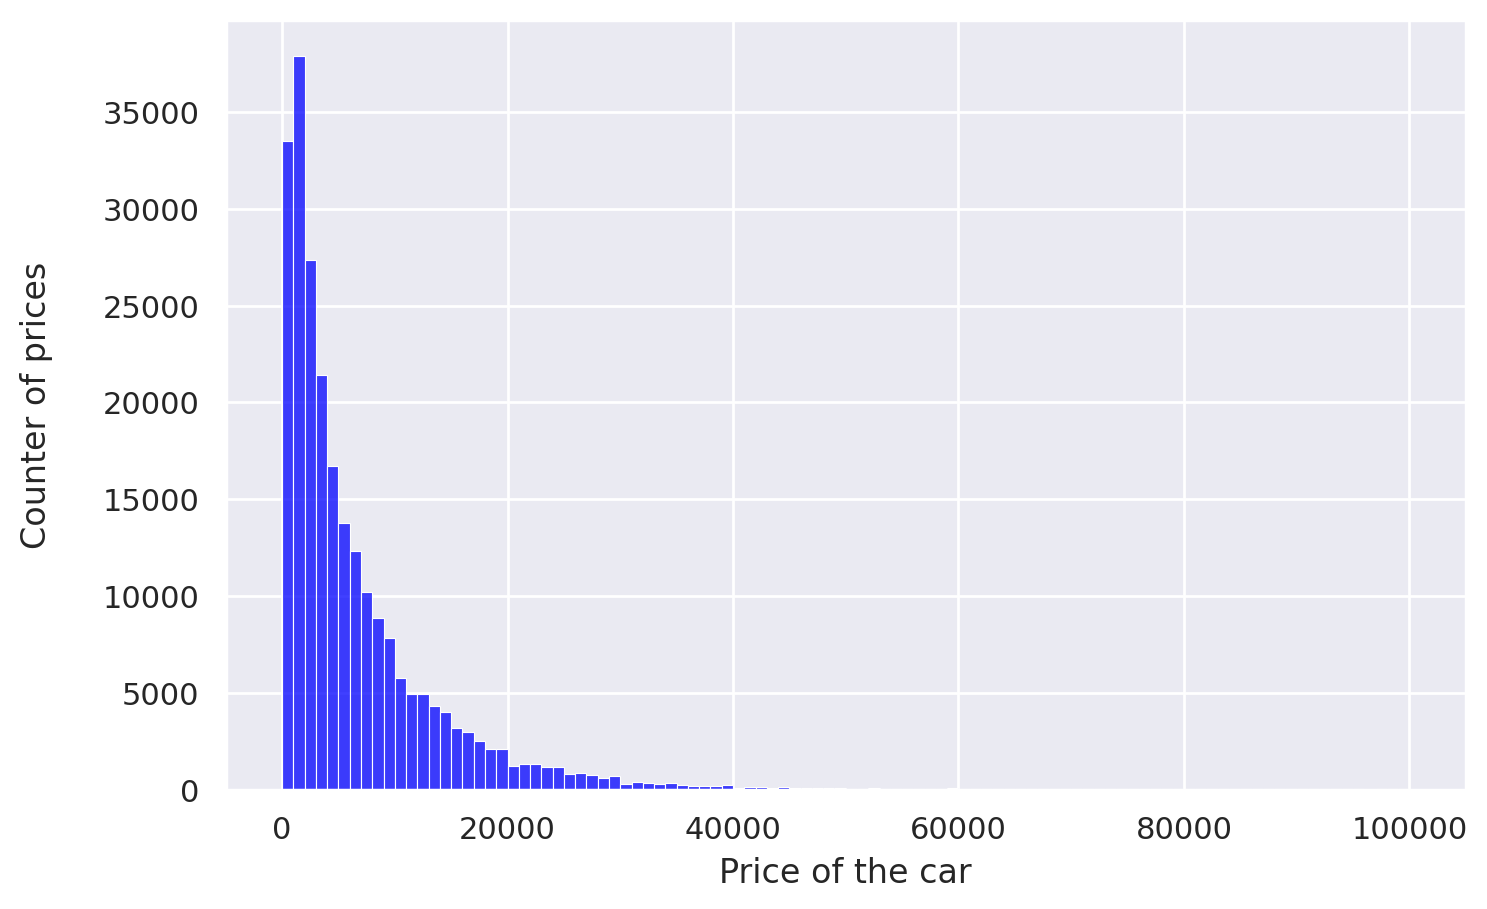

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x = data['price'], ax = ax, bins = 100, color = 'blue')
ax.set_xlabel('Price of the car')
ax.set_ylabel('Counter of prices\n')

In [ ]:
data['log_price'] = np.log1p(data['price'])

Text(0, 0.5, 'Counter of prices\n')

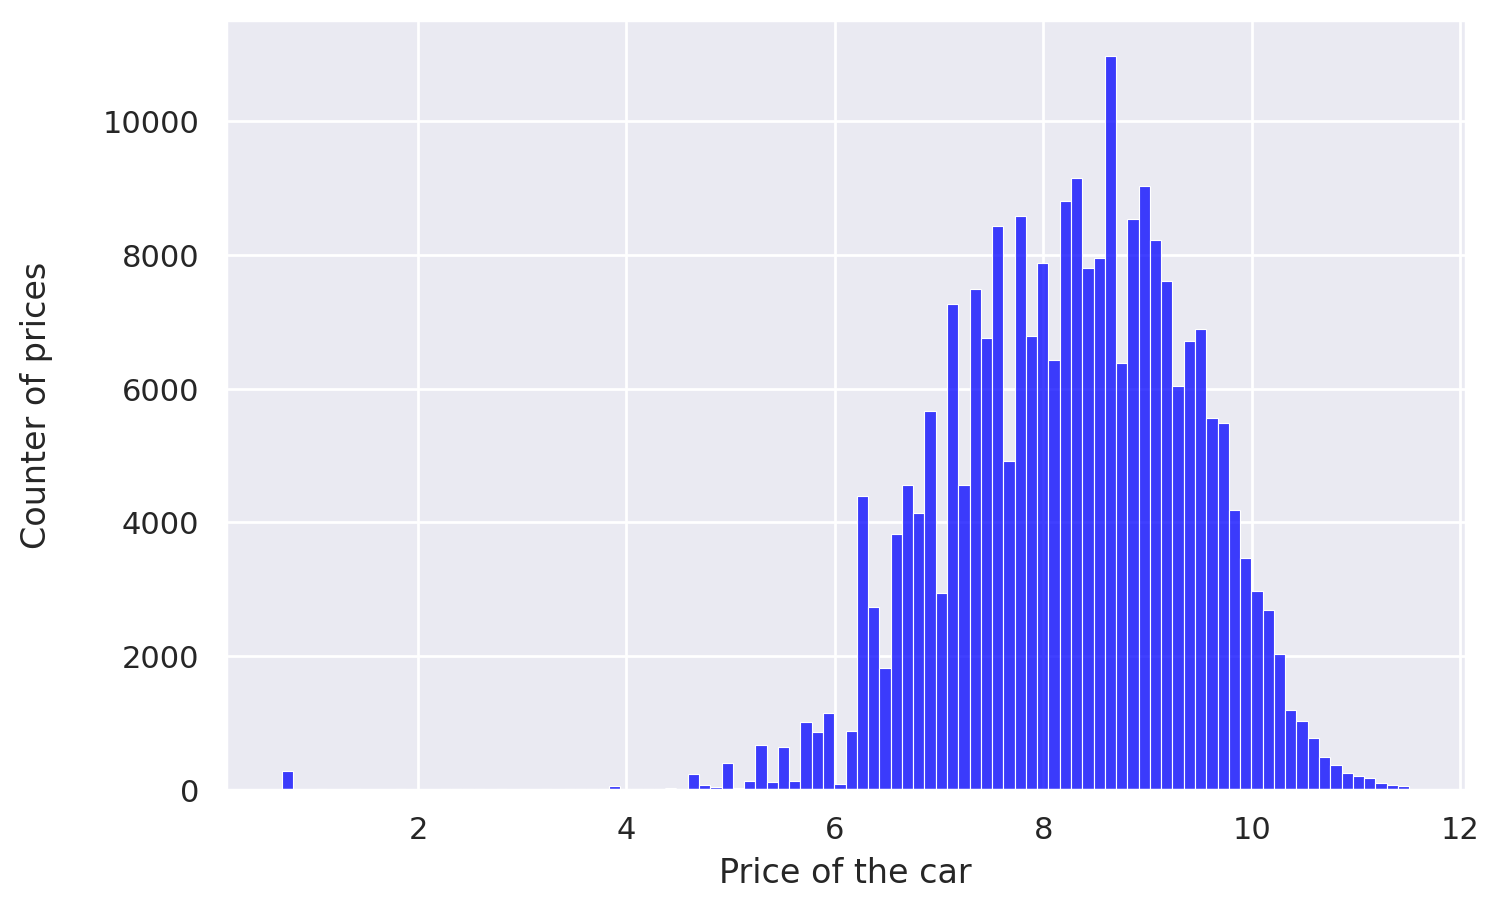

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x = data['log_price'], ax = ax, bins = 100, color = 'blue')
ax.set_xlabel('Price of the car')
ax.set_ylabel('Counter of prices\n')

Использование логарифма и вправду будет полезно тут. Во-первых, хорошая линейная регрессия должна иметь нормальное распределение ошибок. В случае, если мы строим линейную регрессию по данным, основное количество которых сосредоточено в определенном диапазоне, однако есть и много выбросов, то скорее всего маленьких ошибок и больших ошибок будет довольно много, что не соответствует нормальному распределению ошибок. Во-вторых, на логарифмическом графике видны очевидные выбросы, значение которых приблизительно от 1 до 2 у.е.(скорее всего, это доллары). При этом, на обычной шкале их не видно, поэтому и вправду логарифмический график использовать лучше и мы будем работать только с ним.

In [ ]:
#Сделаем маску данных
mask = data['log_price'] > np.percentile(data['log_price'], 0.1)
data_masked = data[mask]

Text(0, 0.5, 'Counter of prices\n')

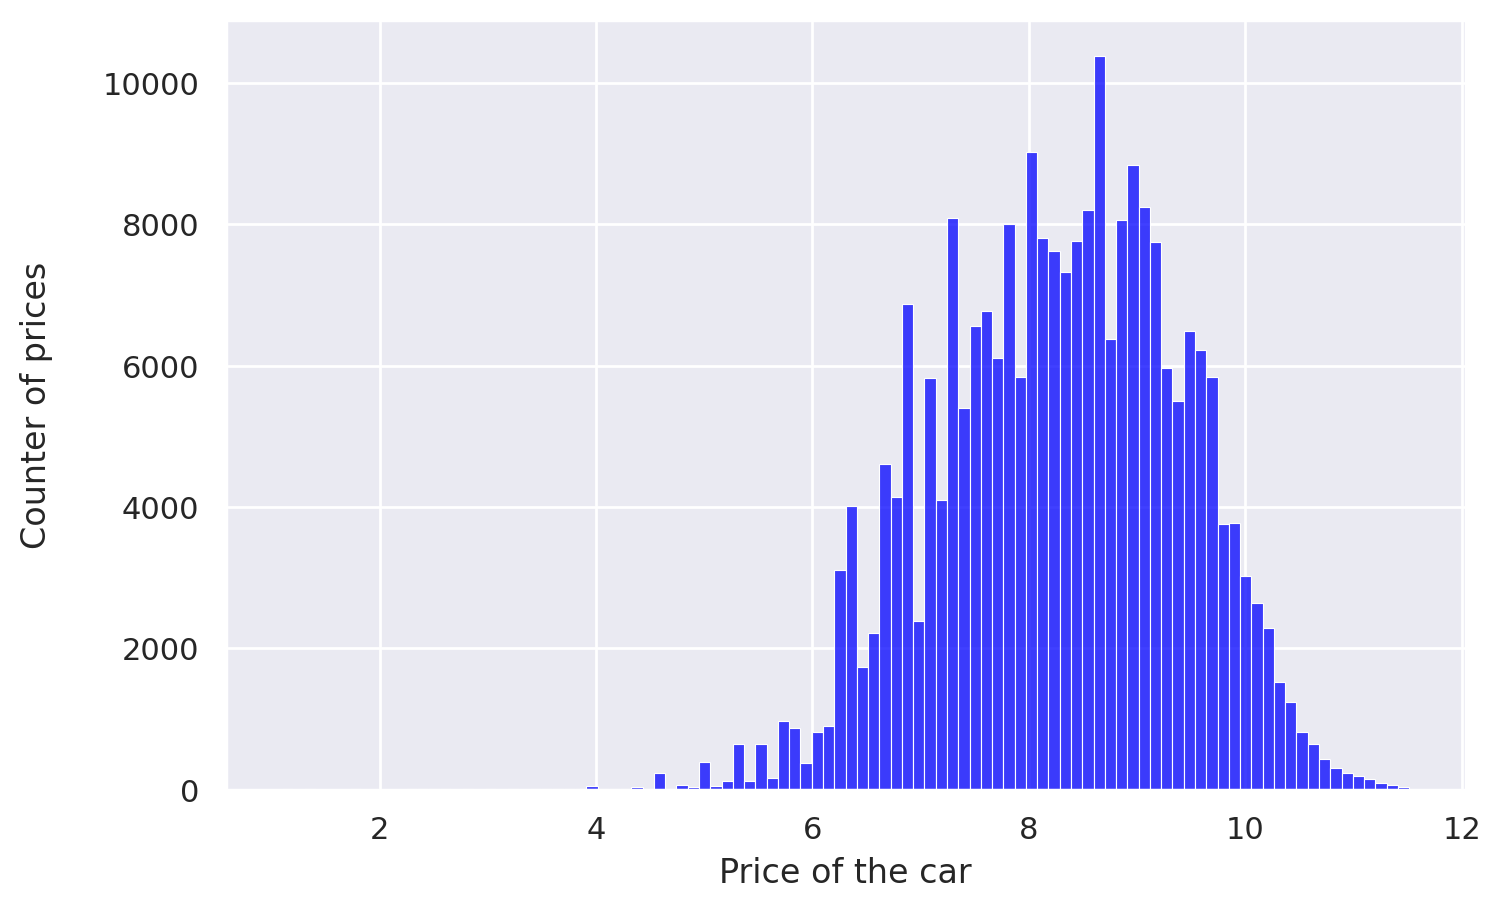

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x = data_masked['log_price'], ax = ax, bins = 100, color = 'blue')
ax.set_xlabel('Price of the car')
ax.set_ylabel('Counter of prices\n')

Теперь строим зависимость целевой переменной от признака и от распределения признак

**Строим зависимость целевой переменной от марки**

График 1: Зависимость среднего значения логарифма цены от марки

График 2: График распределения значений признака

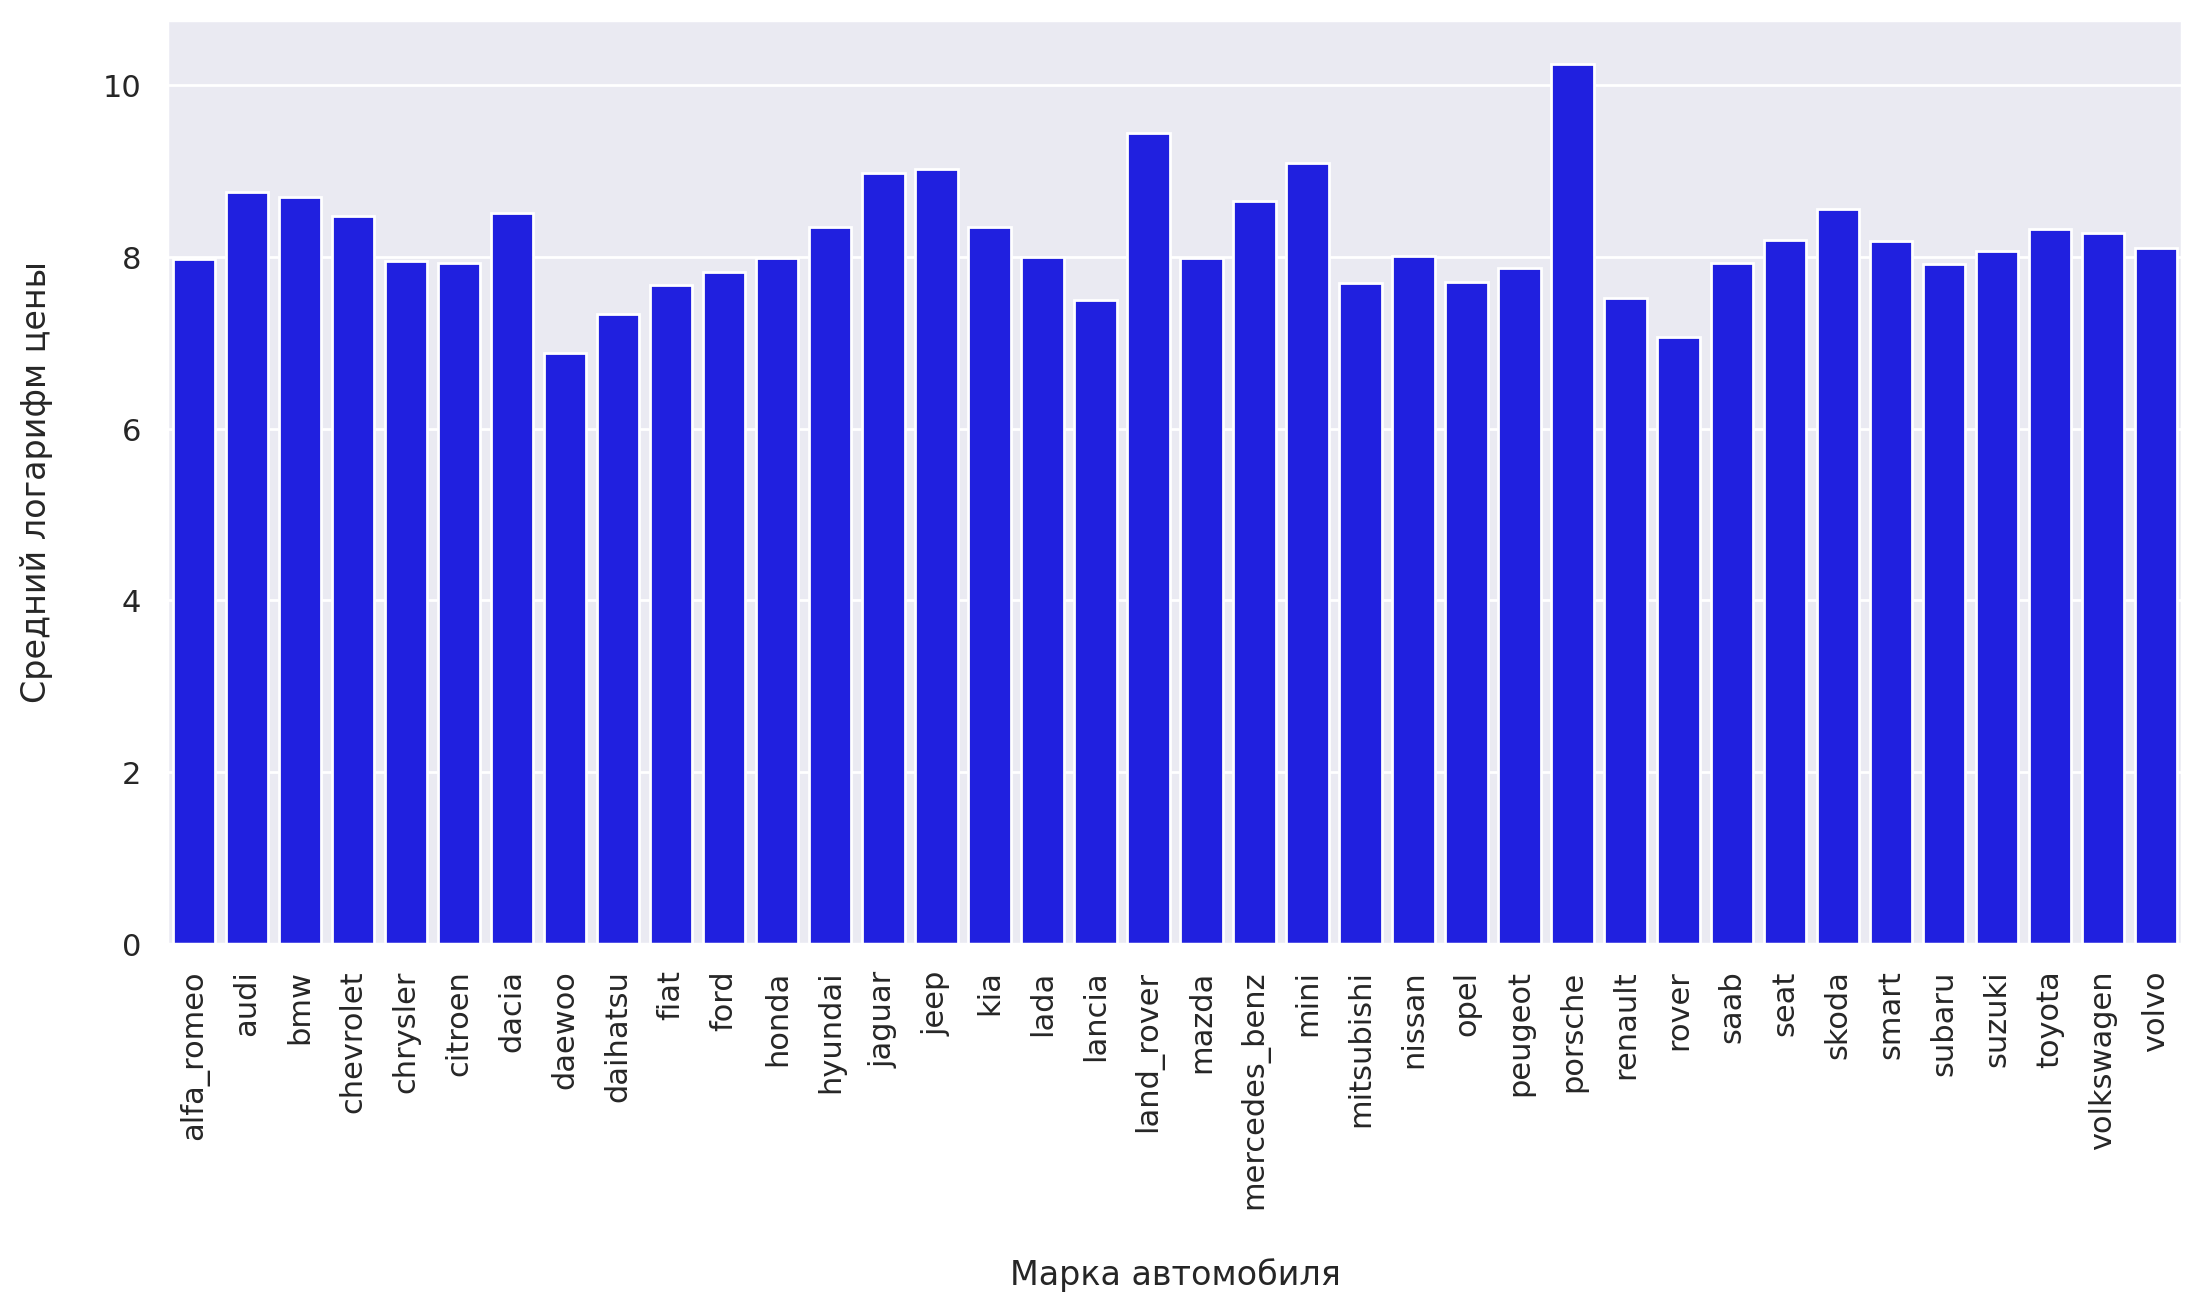

In [ ]:
brand_price = data_masked.groupby('brand')['log_price'].mean()
xticks = brand_price.index.tolist()
fig, ax = plt.subplots(figsize = (13, 6))
sns.barplot(brand_price, color = 'blue')
ax.set_xticks(np.arange(len(xticks)))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nМарка автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

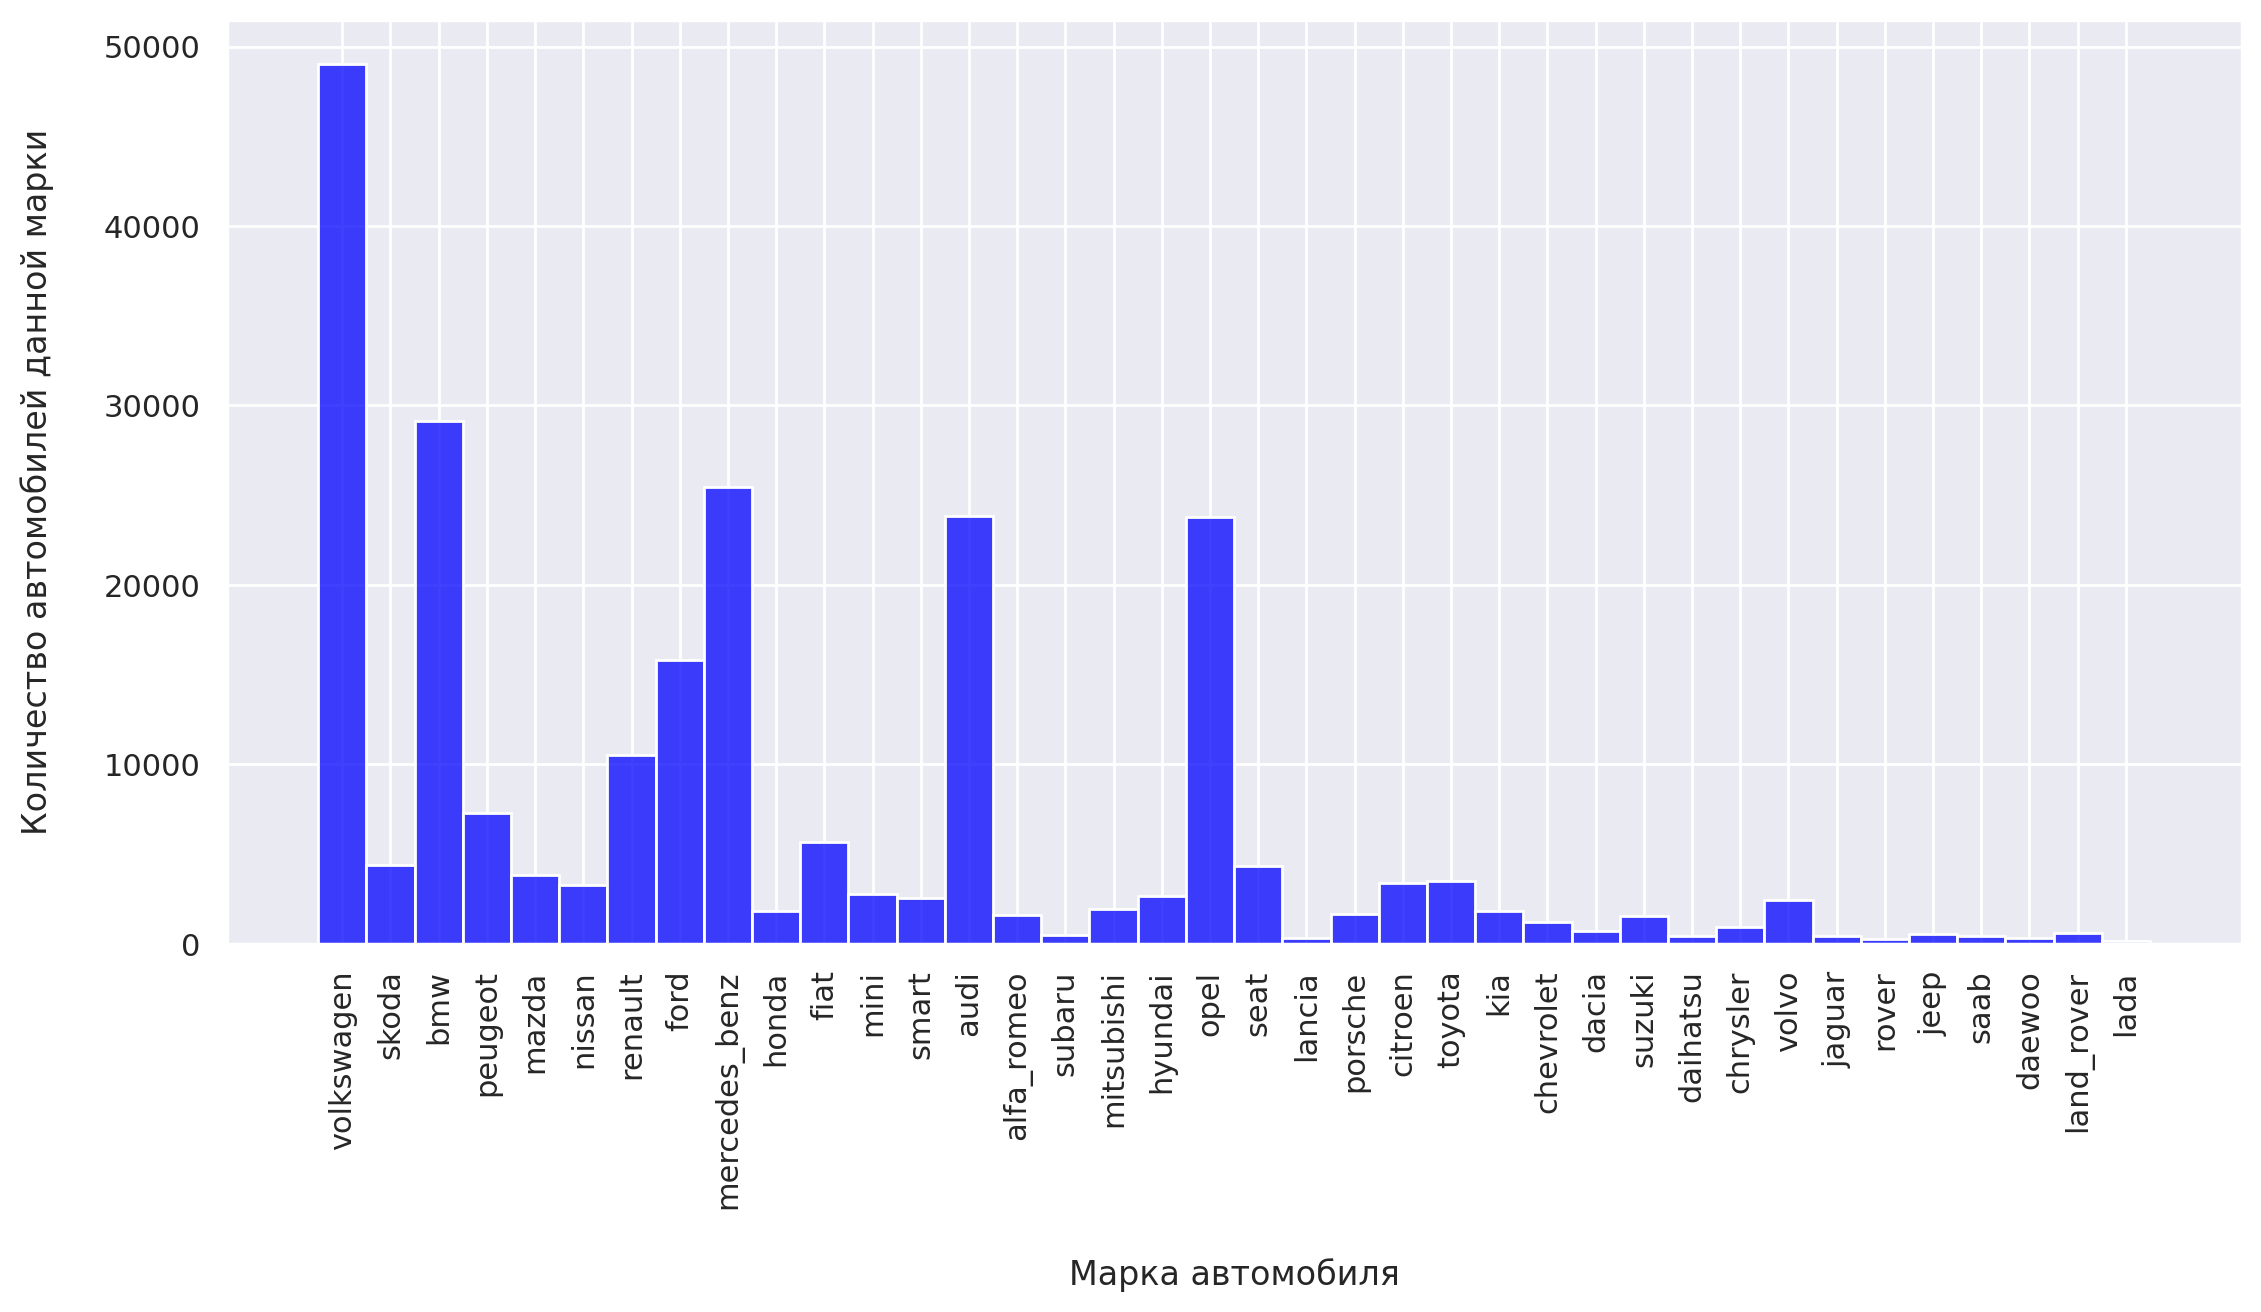

In [ ]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.histplot(x = data_masked['brand'], ax = ax, color = 'blue')
ax.set_xticks(np.arange(data_masked['brand'].nunique()))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nМарка автомобиля')
ax.set_ylabel('Количество автомобилей данной марки\n')
plt.show()

**Строим зависимость целевой переменной от модели**

График 1: Зависимость среднего значения логарифма цены от модели

График 2: График распределения значений признака

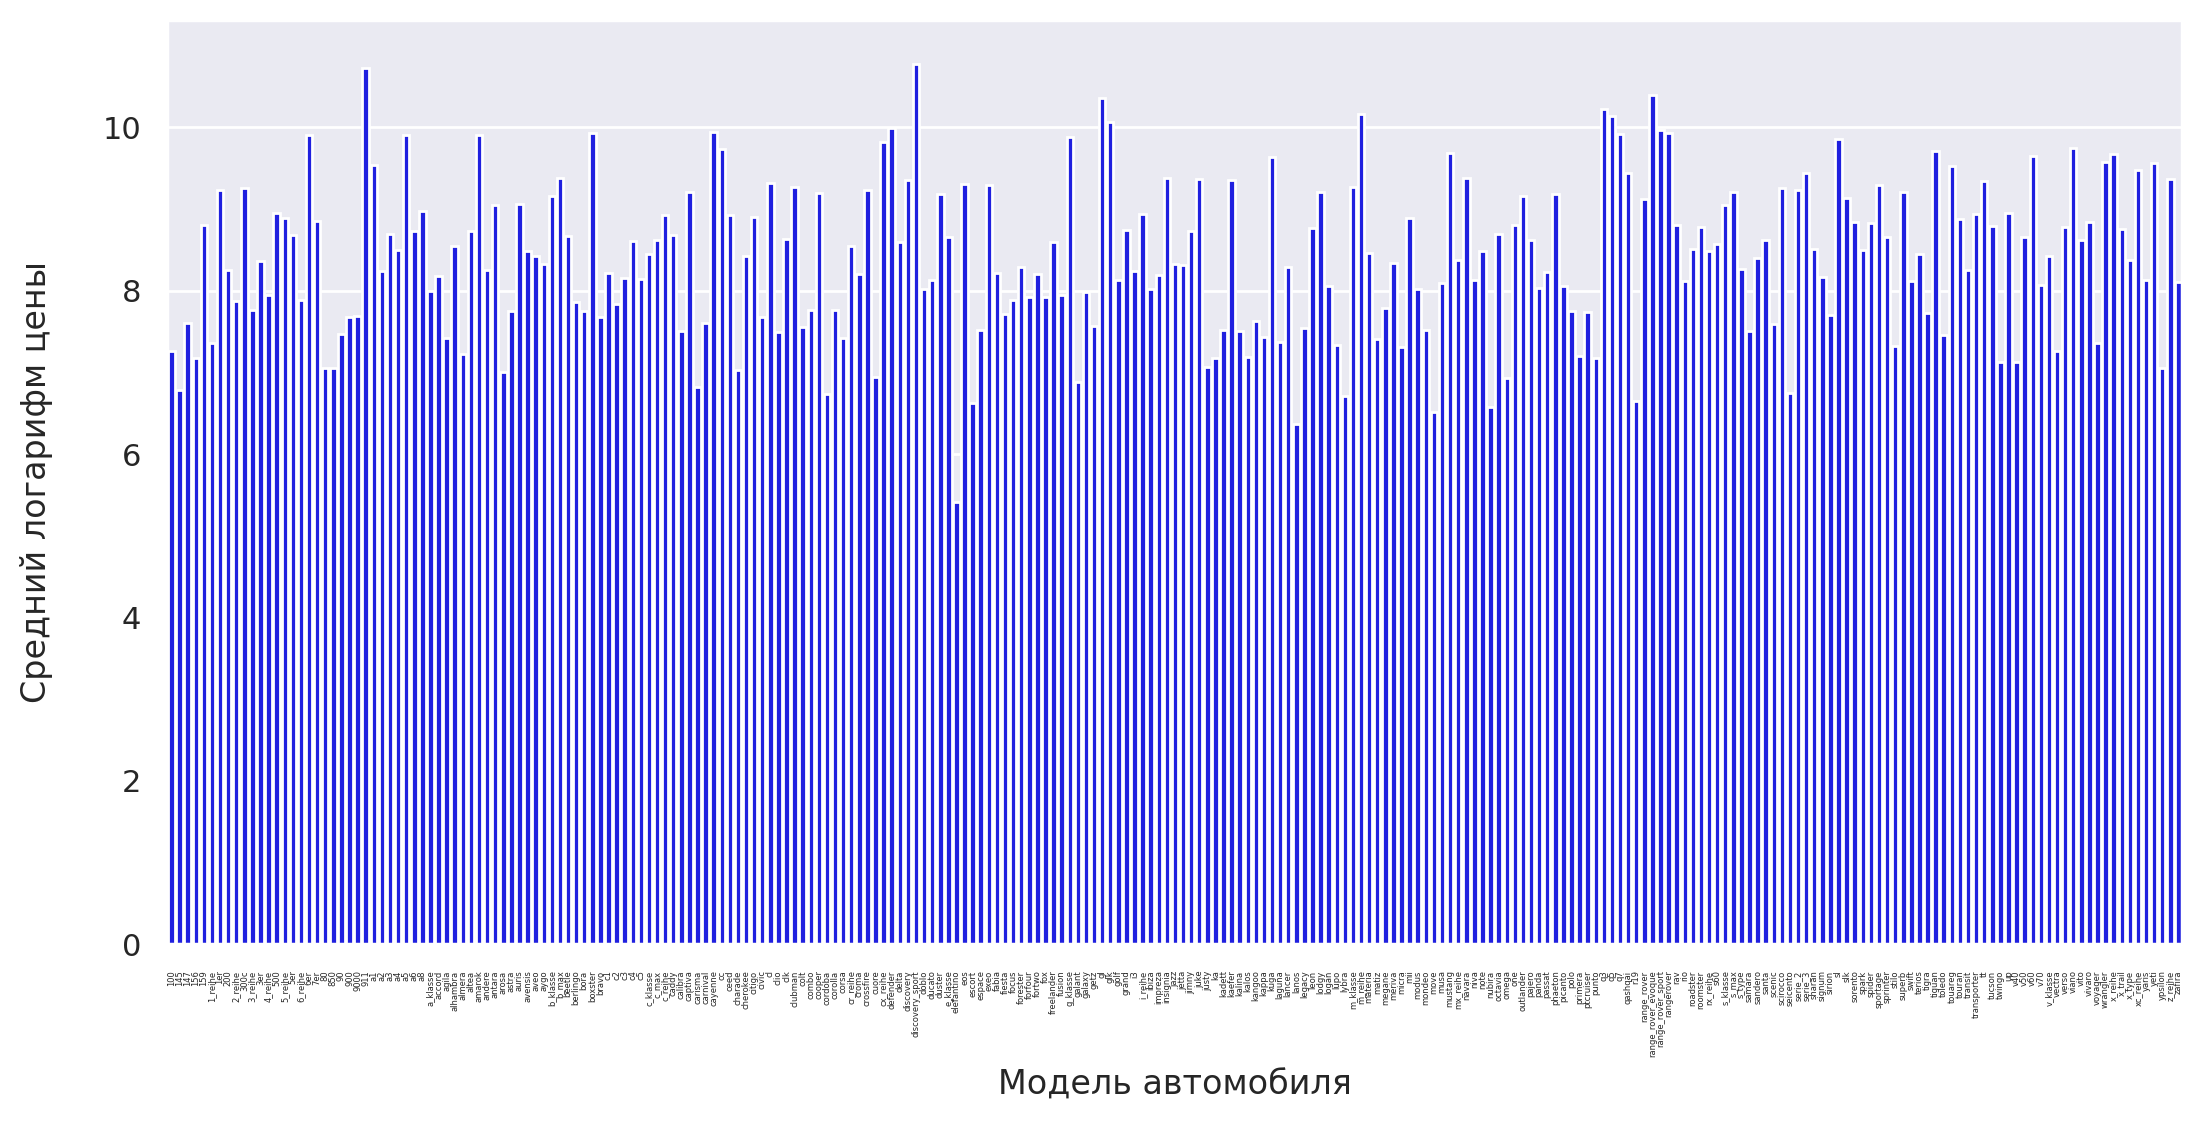

In [ ]:
model_price = data_masked.groupby('model')['log_price'].mean()
xticks = model_price.index.tolist()
fig, ax = plt.subplots(figsize = (13, 6))
sns.barplot(model_price, color = 'blue')
ax.set_xticks(np.arange(len(xticks)))
ax.tick_params(axis='x', labelsize=3, rotation=90)
ax.set_xlabel('Модель автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

Text(0, 0.5, 'Количество автомобилей данной модели\n')

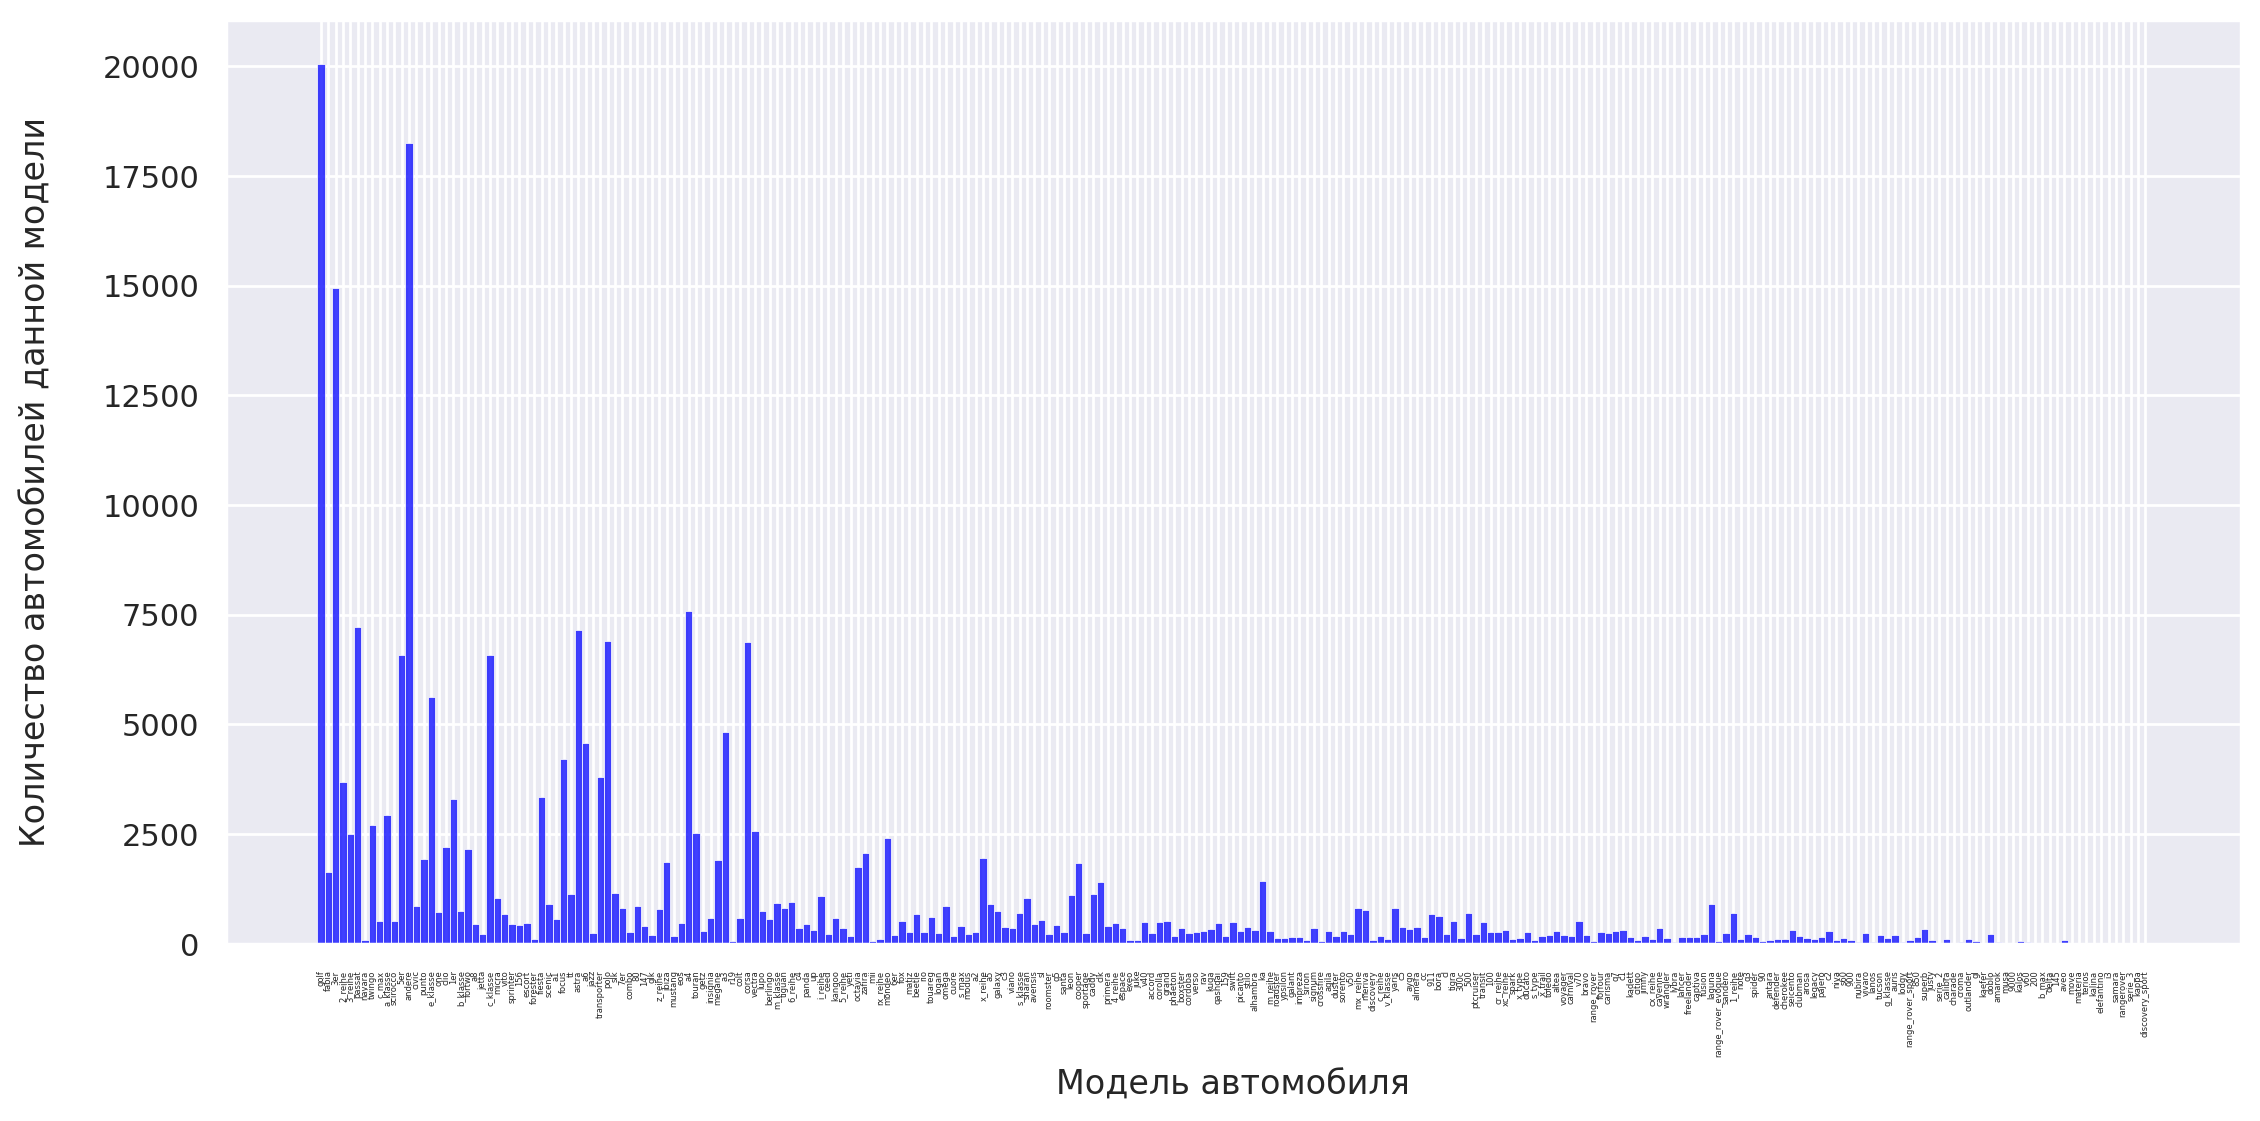

In [ ]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.histplot(x = data_masked['model'], ax = ax, color = 'blue')
ax.set_xticks(np.arange(data_masked['model'].nunique()))
ax.tick_params(axis='x', rotation=90, labelsize = 3)
ax.set_xlabel('Модель автомобиля')
ax.set_ylabel('Количество автомобилей данной модели\n')

**Строим зависимость целевой переменной от типа автомобиля**

График 1: Зависимость среднего значения логарифма цены от типа автомобиля

График 2: График распределения значений признака

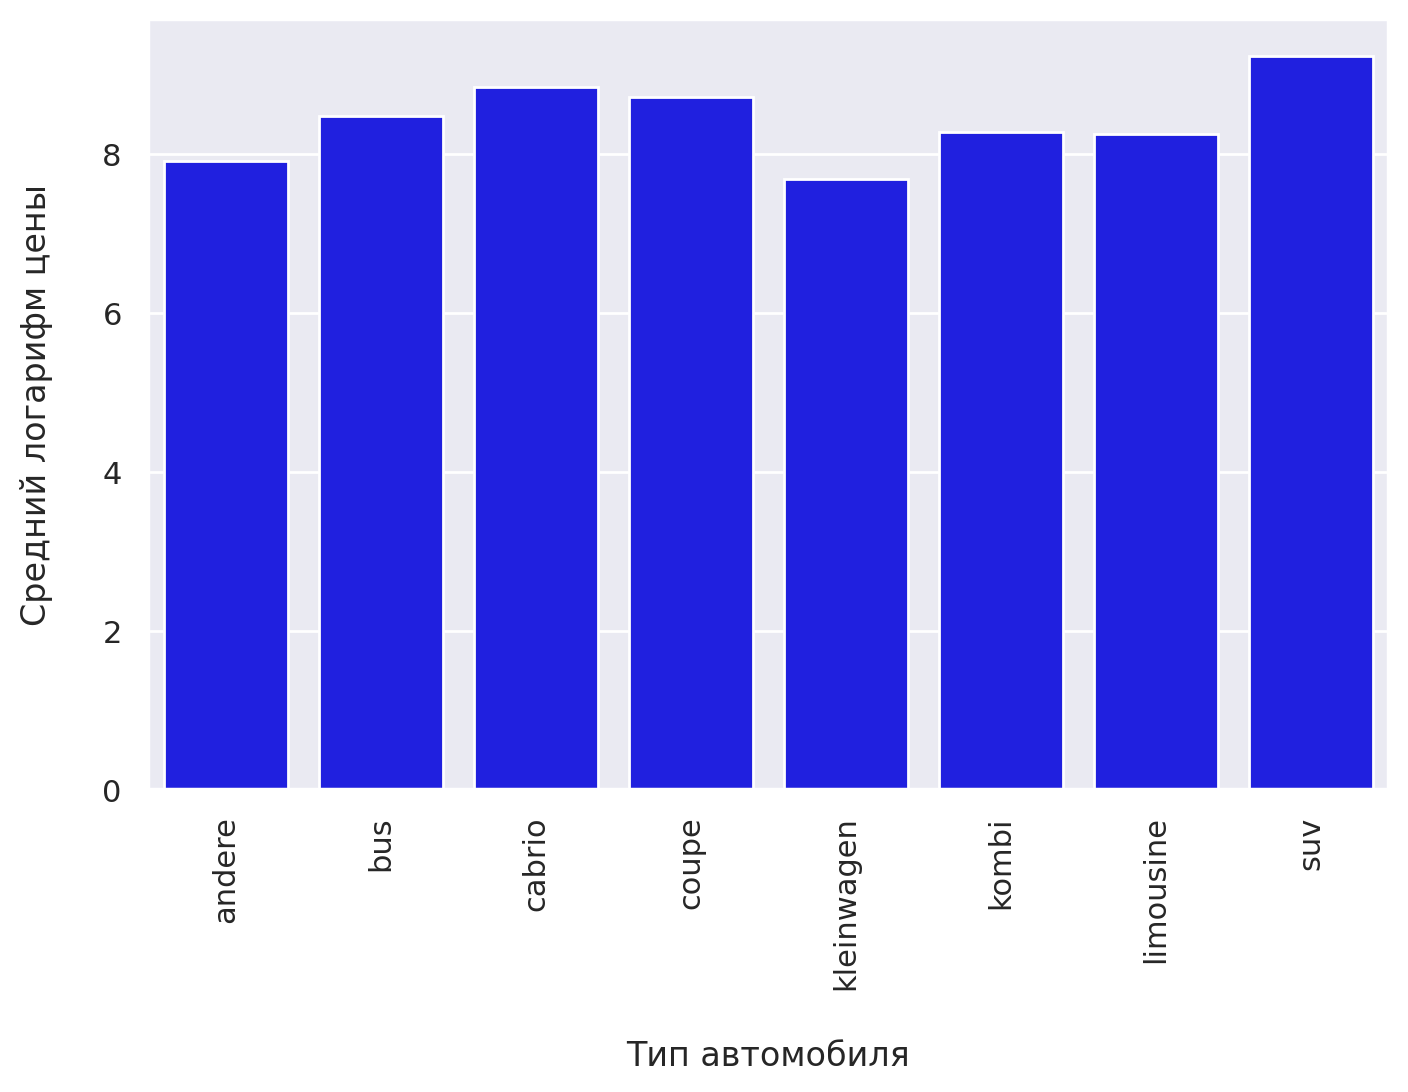

In [ ]:
veh_type_price = data_masked.groupby('vehicleType')['log_price'].mean()
xticks = veh_type_price.index.tolist()
fig, ax = plt.subplots()
sns.barplot(veh_type_price, color = 'blue')
ax.set_xticks(np.arange(len(xticks)))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nТип автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

Text(0, 0.5, 'Количество автомобилей данного типа\n')

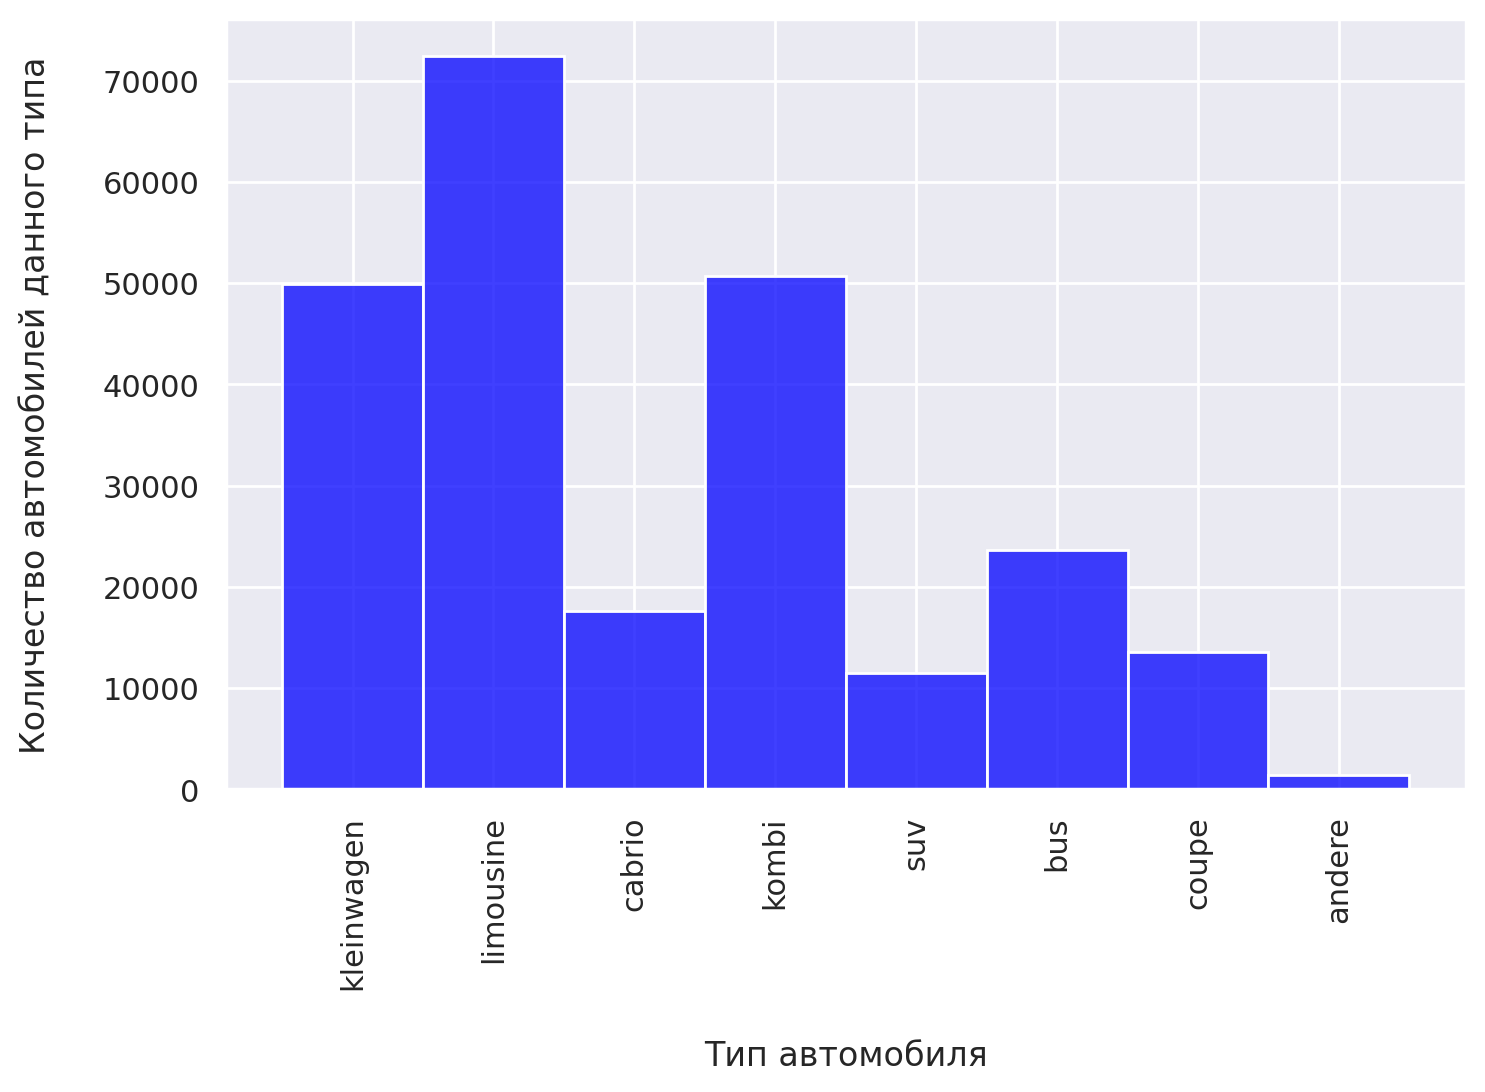

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x = data_masked['vehicleType'], ax = ax, color = 'blue')
ax.set_xticks(np.arange(data_masked['vehicleType'].nunique()))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nТип автомобиля')
ax.set_ylabel('Количество автомобилей данного типа\n')

**Строим зависимость целевой переменной от типа коробки передач**

График 1: Зависимость среднего значения логарифма цены от коробки передач

График 2: График распределения значений признака

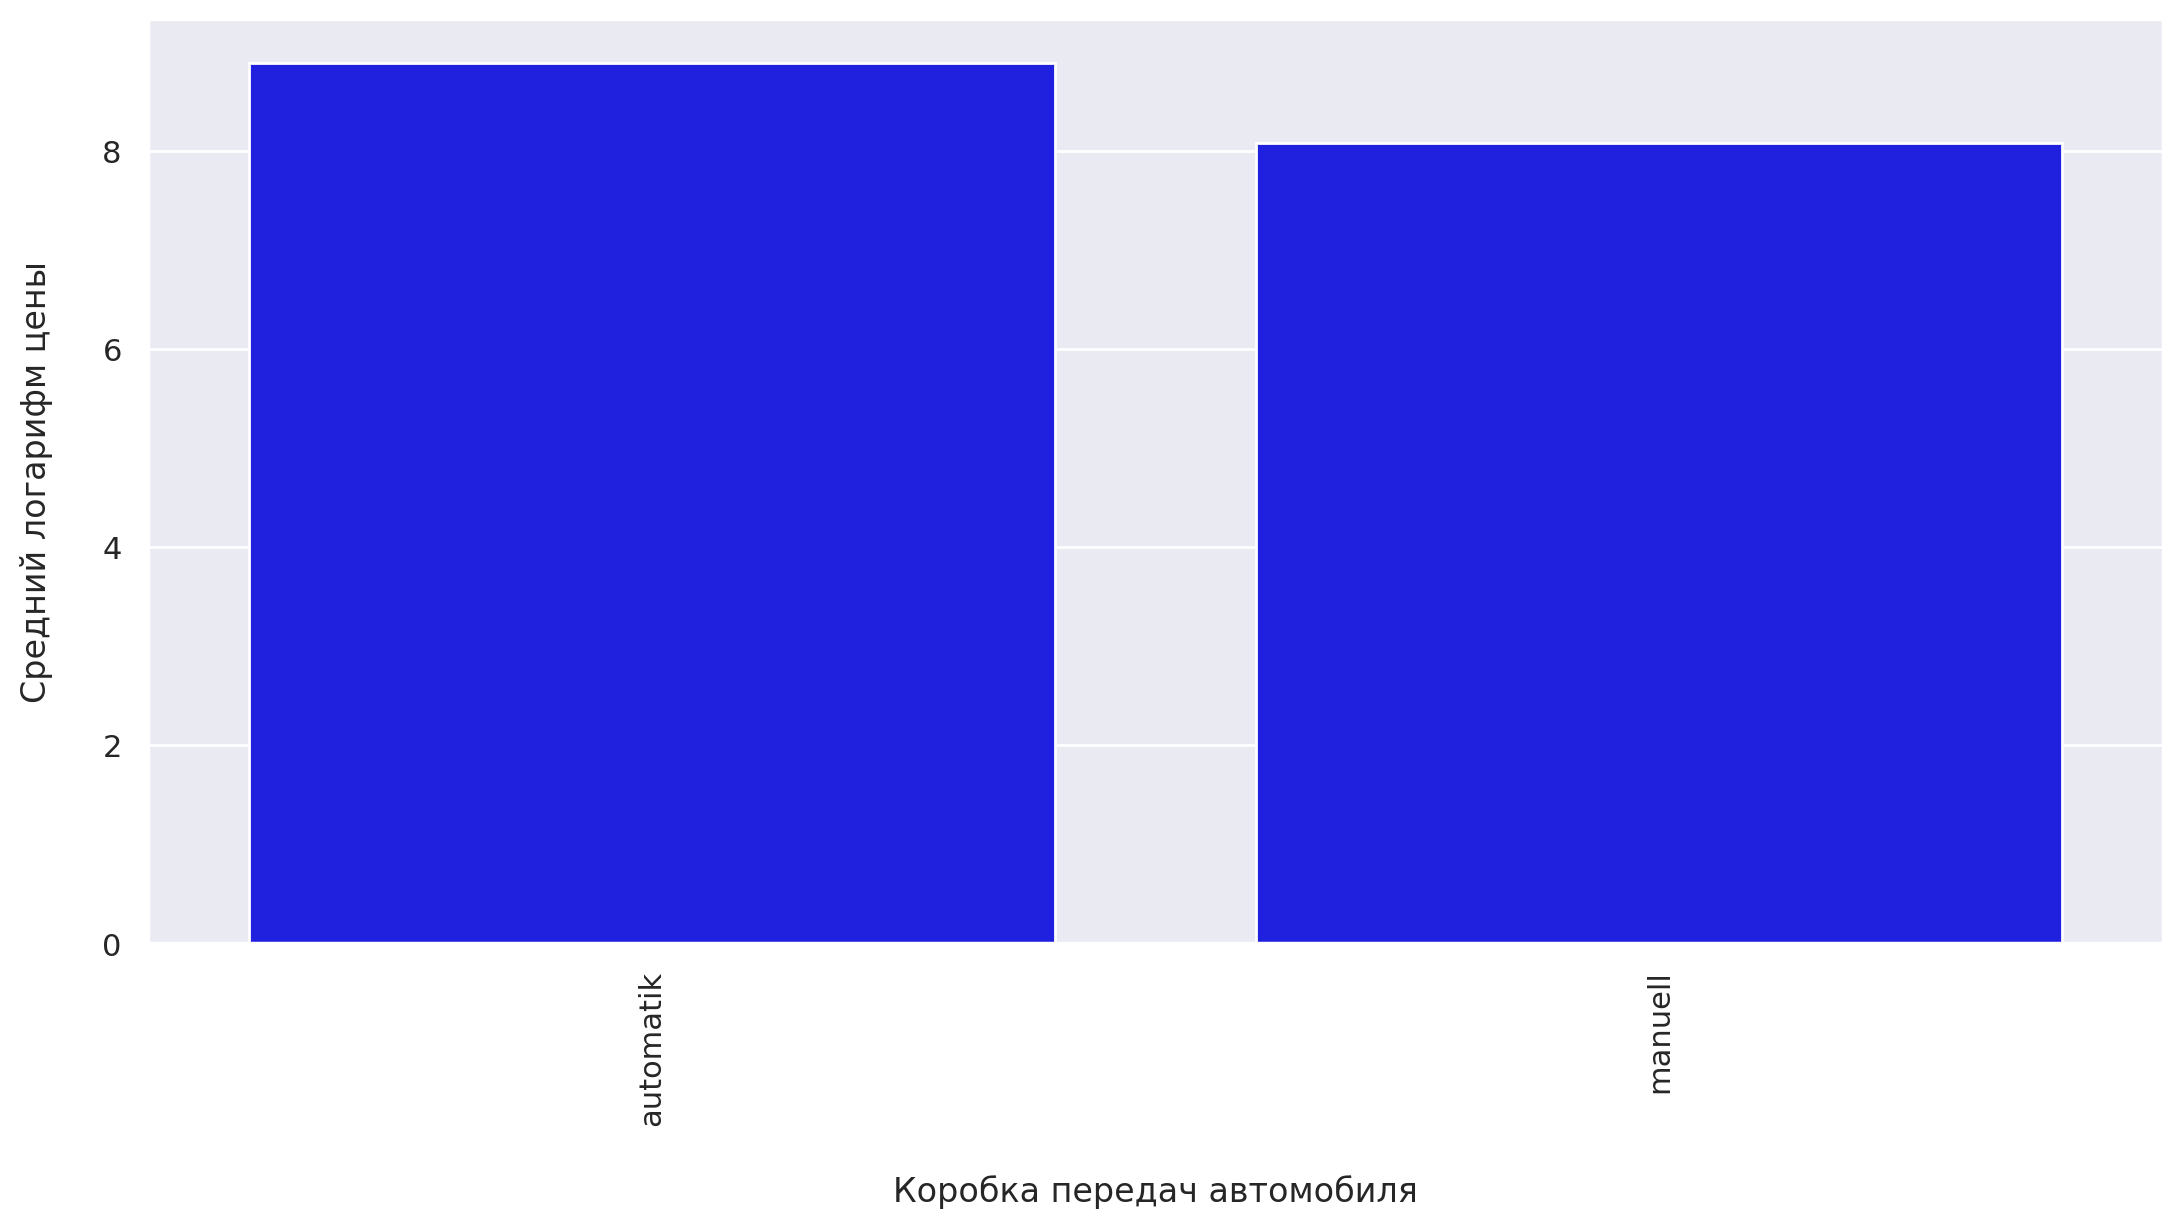

In [ ]:
gearbox_price = data_masked.groupby('gearbox')['log_price'].mean()
xticks = gearbox_price.index.tolist()
fig, ax = plt.subplots(figsize = (13, 6))
sns.barplot(gearbox_price, color = 'blue')
ax.set_xticks(np.arange(len(xticks)))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nКоробка передач автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

Text(0, 0.5, 'Количество автомобилей с данной коробкой передач\n')

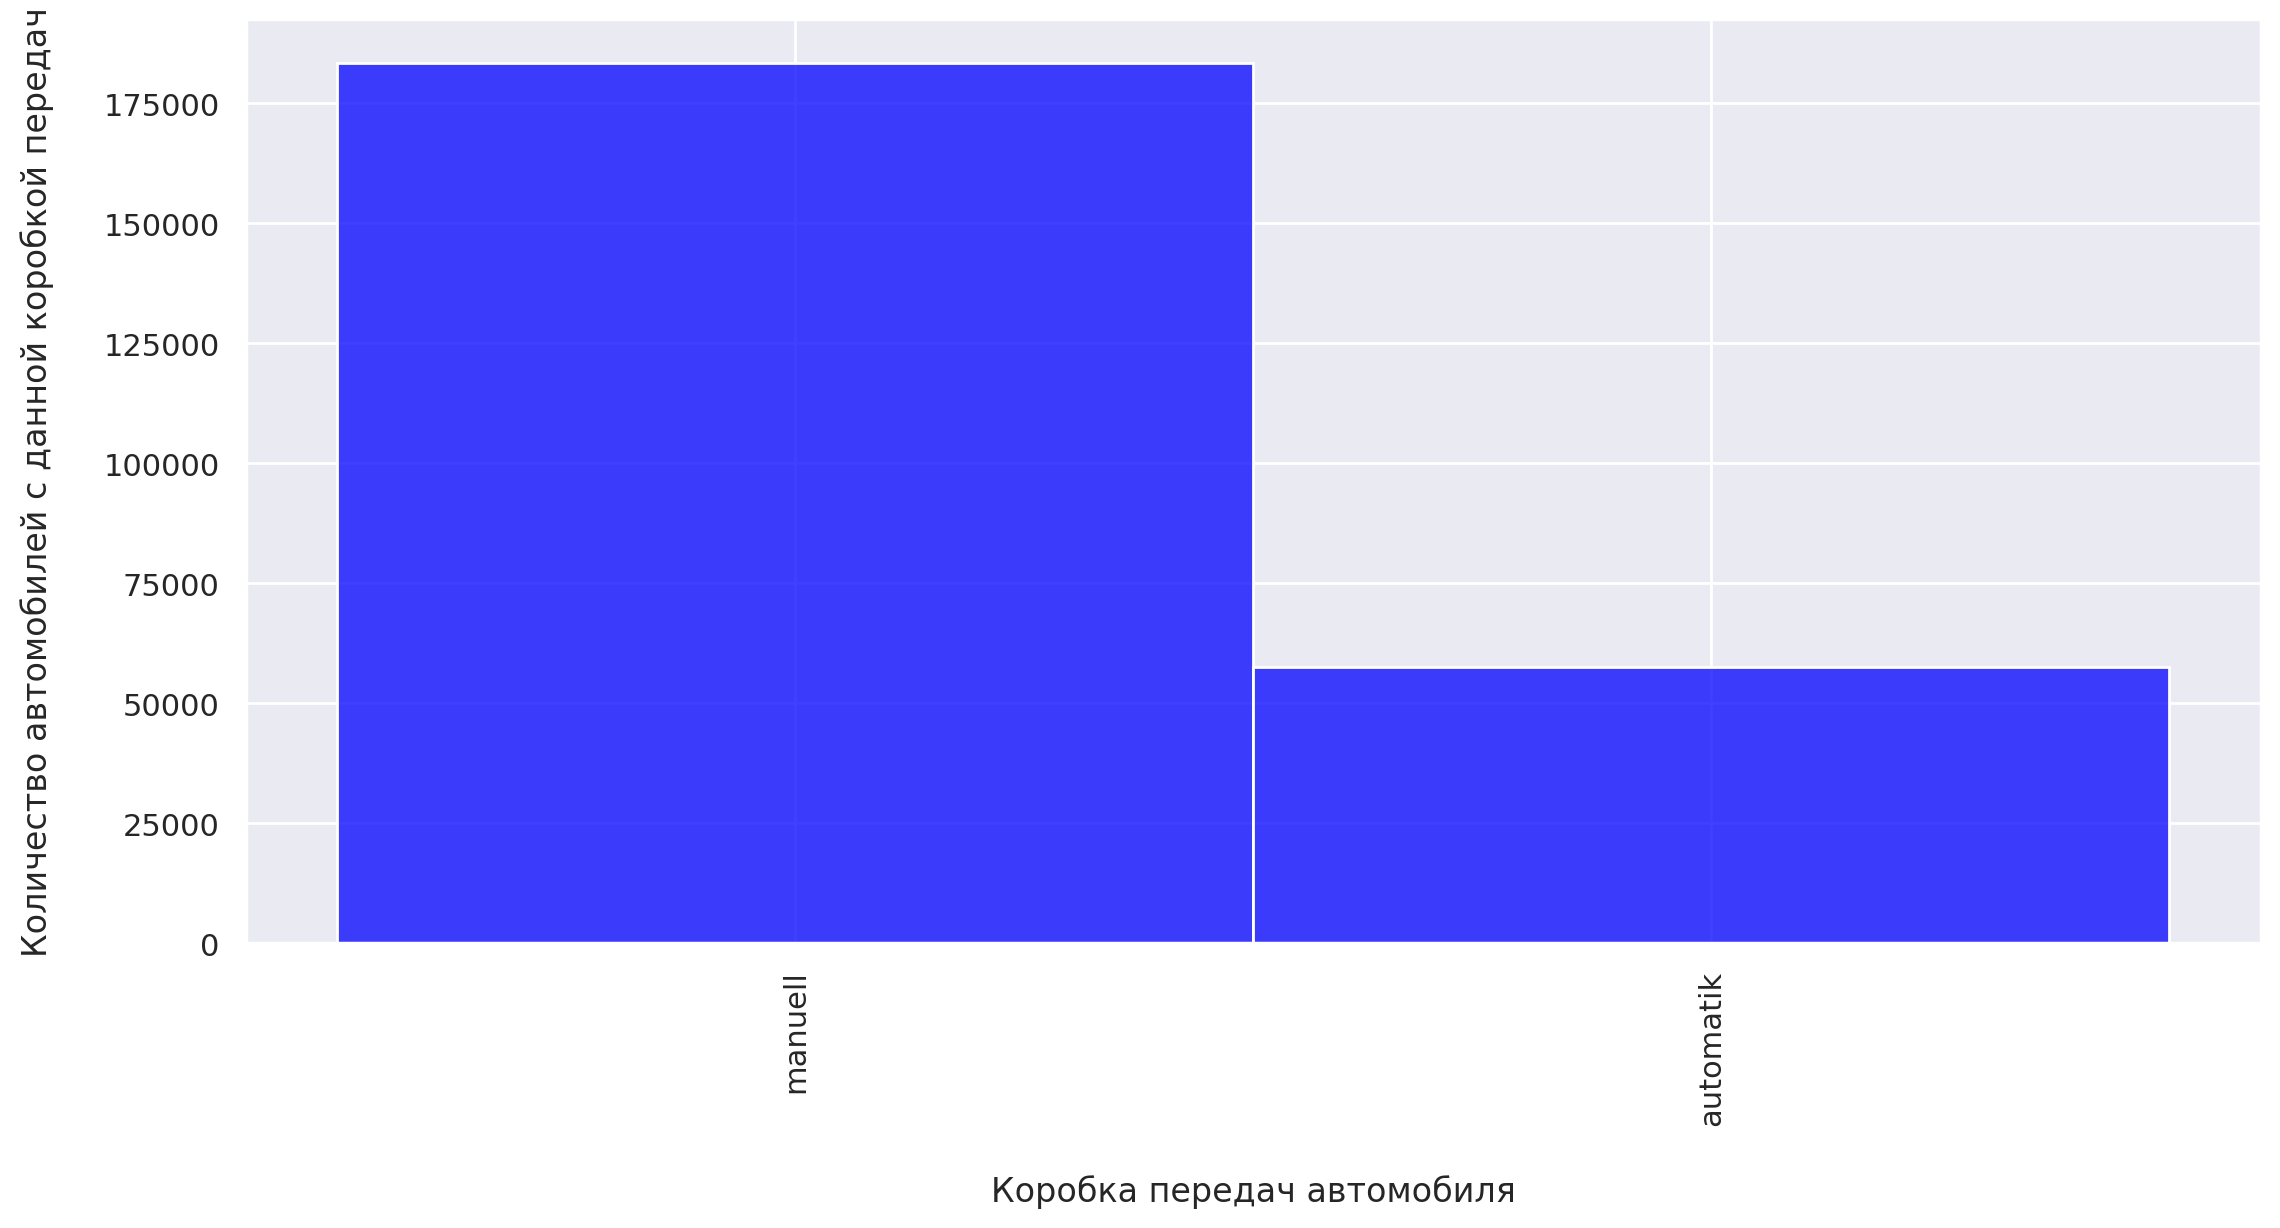

In [ ]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.histplot(x = data_masked['gearbox'], ax = ax, color = 'blue')
ax.set_xticks(np.arange(data_masked['gearbox'].nunique()))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nКоробка передач автомобиля')
ax.set_ylabel('Количество автомобилей с данной коробкой передач\n')

**Строим зависимость целевой переменной от типа топлива**

График 1: Зависимость среднего значения логарифма цены от типа топлива

График 2: График распределения значений признака

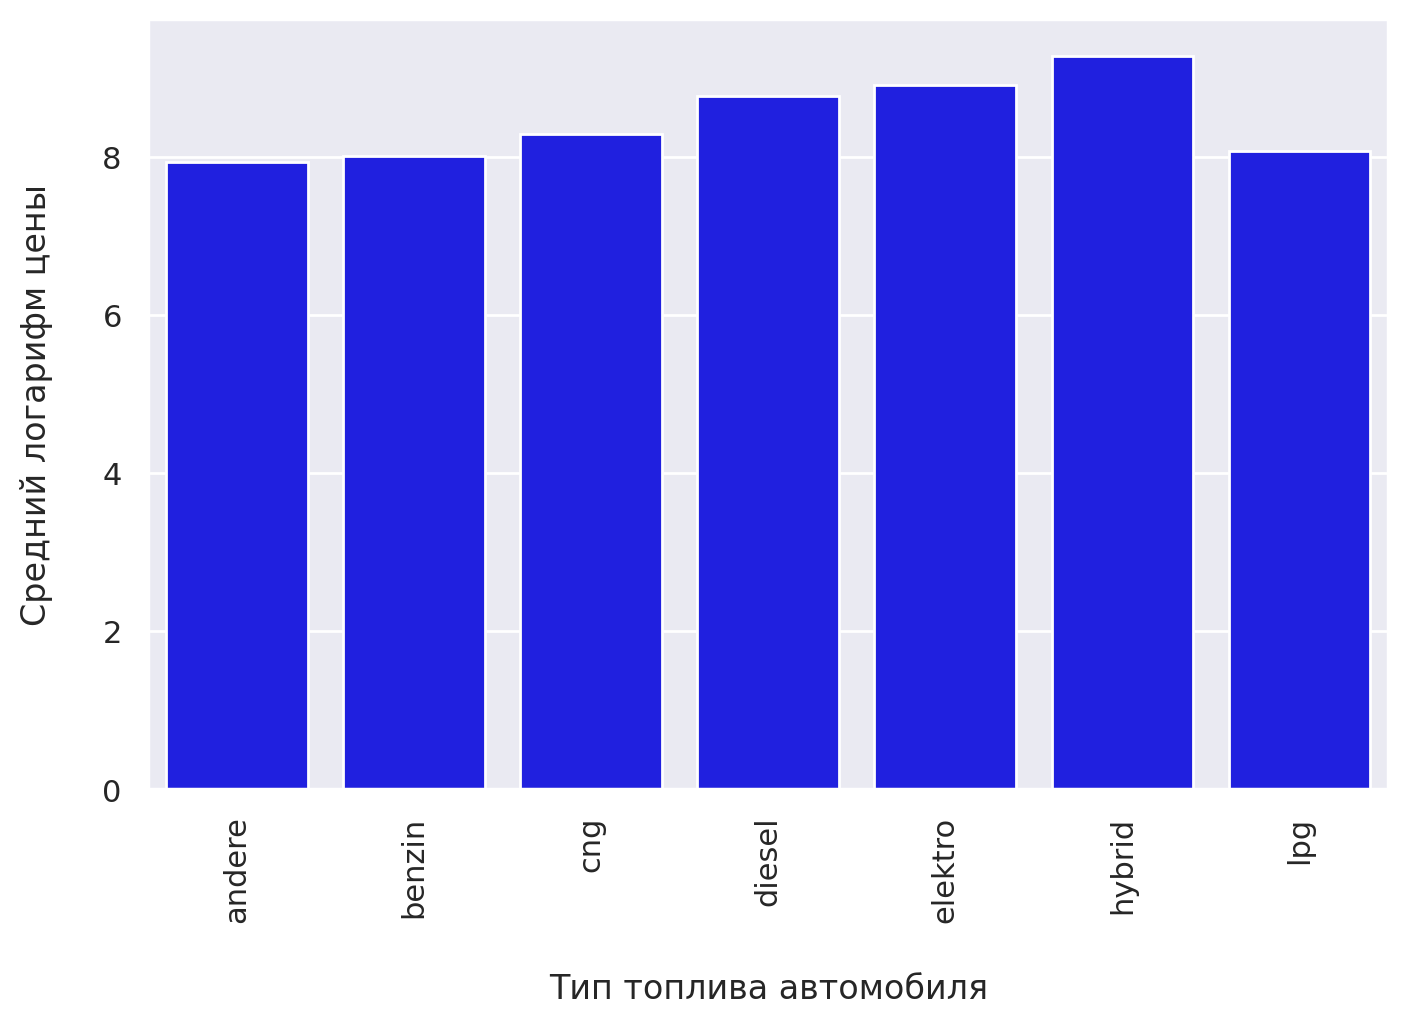

In [ ]:
fuel_t_price = data_masked.groupby('fuelType')['log_price'].mean()
xticks = fuel_t_price.index.tolist()
fig, ax = plt.subplots()
sns.barplot(fuel_t_price, color = 'blue')
ax.set_xticks(np.arange(len(xticks)))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nТип топлива автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

Text(0, 0.5, 'Количество автомобилей с данным топливом\n')

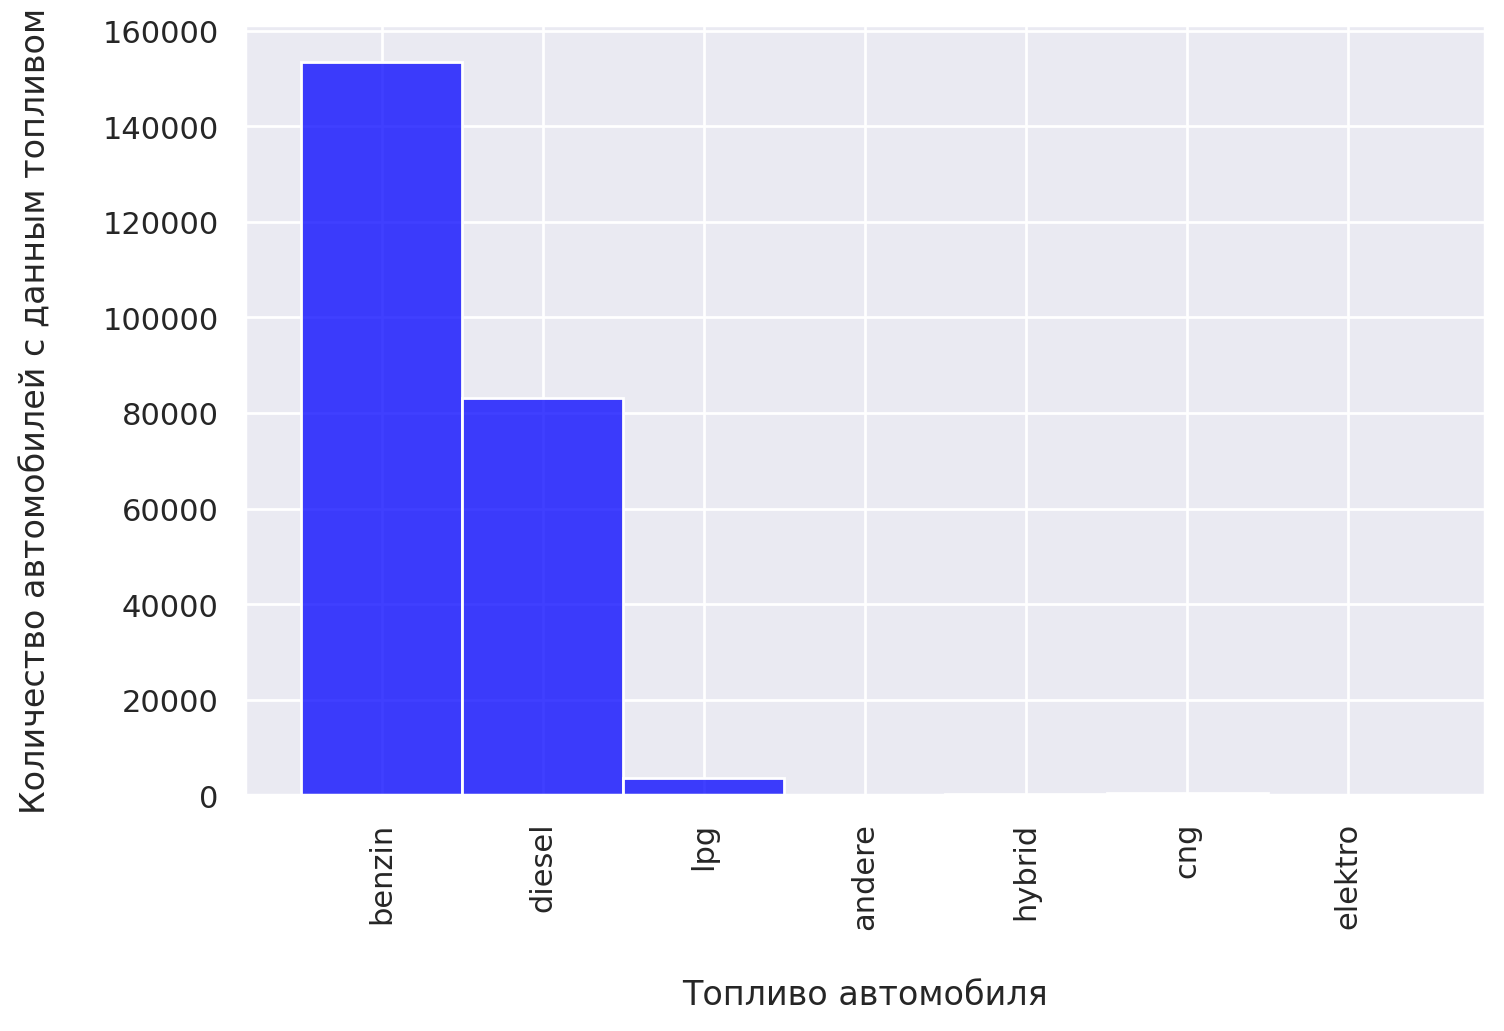

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x = data_masked['fuelType'], ax = ax, color = 'blue')
ax.set_xticks(np.arange(data_masked['fuelType'].nunique()))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nТопливо автомобиля')
ax.set_ylabel('Количество автомобилей с данным топливом\n')

**Строим зависимость целевой переменной от наличия урона**

График 1: Зависимость среднего значения логарифма цены от наличия урона

График 2: График распределения значений признака

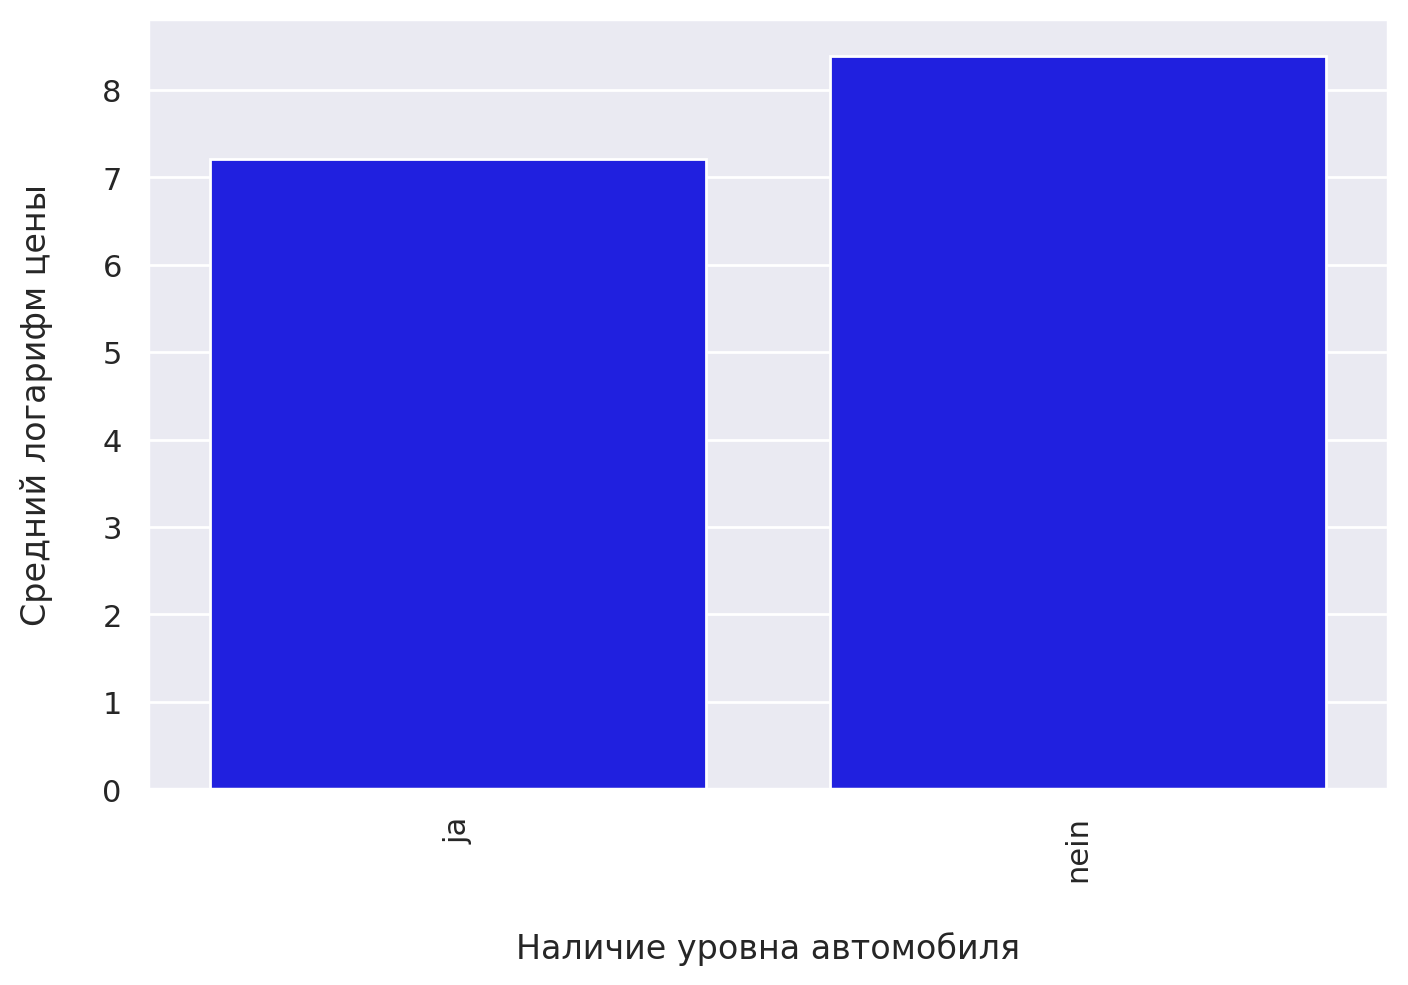

In [ ]:
damaged_price = data_masked.groupby('notRepairedDamage')['log_price'].mean()
xticks = damaged_price.index.tolist()
fig, ax = plt.subplots()
sns.barplot(damaged_price, color = 'blue')
ax.set_xticks(np.arange(len(xticks)))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nНаличие уровна автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

Text(0, 0.5, 'Количество автомобилей соответствующих урону\n')

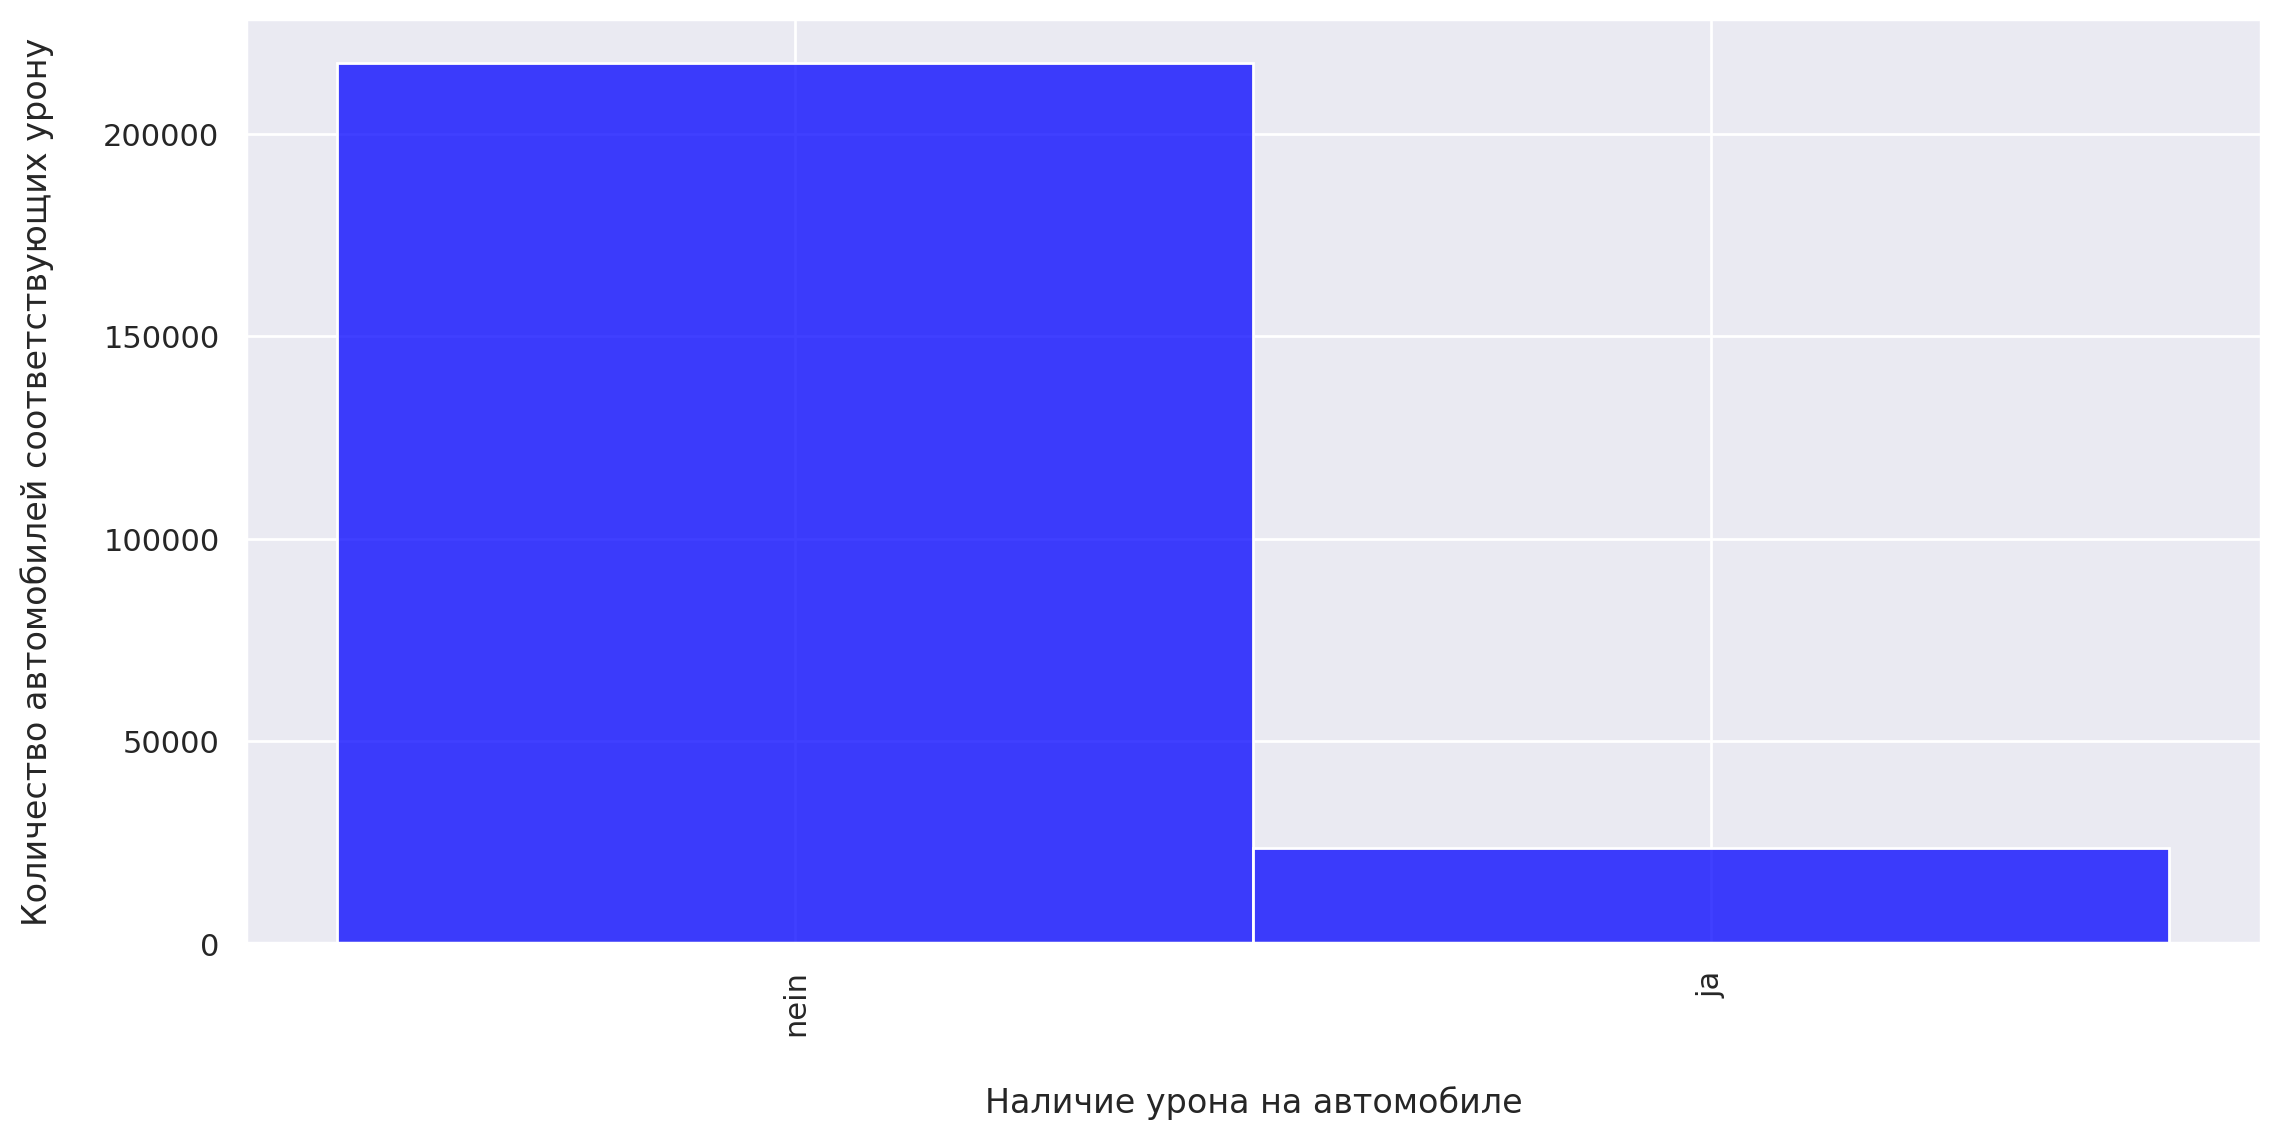

In [ ]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.histplot(x = data_masked['notRepairedDamage'], ax = ax, color = 'blue')
ax.set_xticks(np.arange(data_masked['notRepairedDamage'].nunique()))
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('\nНаличие урона на автомобиле')
ax.set_ylabel('Количество автомобилей соответствующих урону\n')

**Строим зависимость целевой переменной от количества лошадиных сил**

График 1: Зависимость среднего значения логарифма цены от количества лошадиных сил

График 2: График распределения значений признака

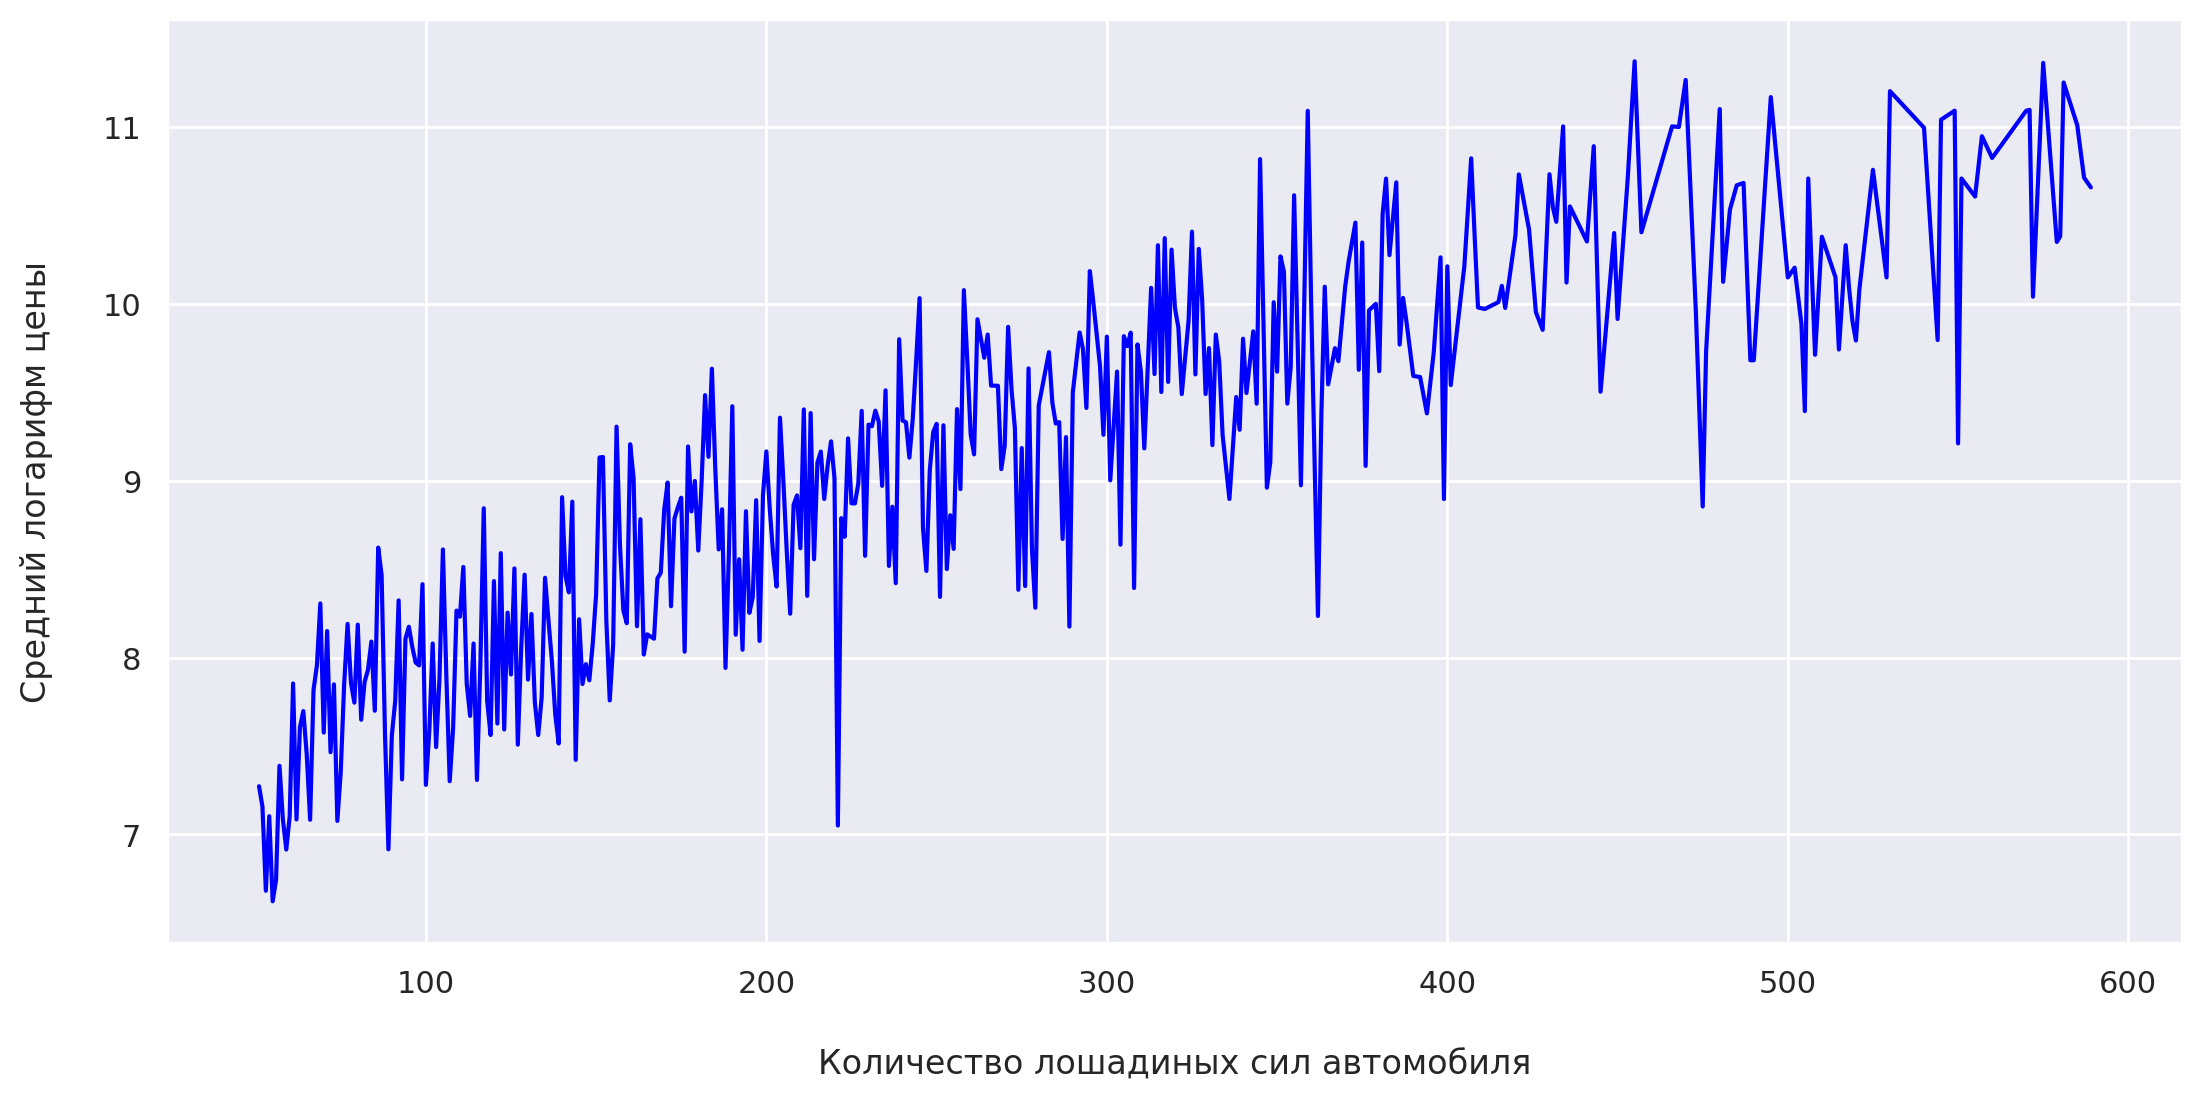

In [ ]:
power_price = data_masked.groupby('powerPS')['log_price'].mean()
fig, ax = plt.subplots(figsize = (13, 6))
sns.lineplot(power_price, color = 'blue')
ax.set_xlabel('\nКоличество лошадиных сил автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

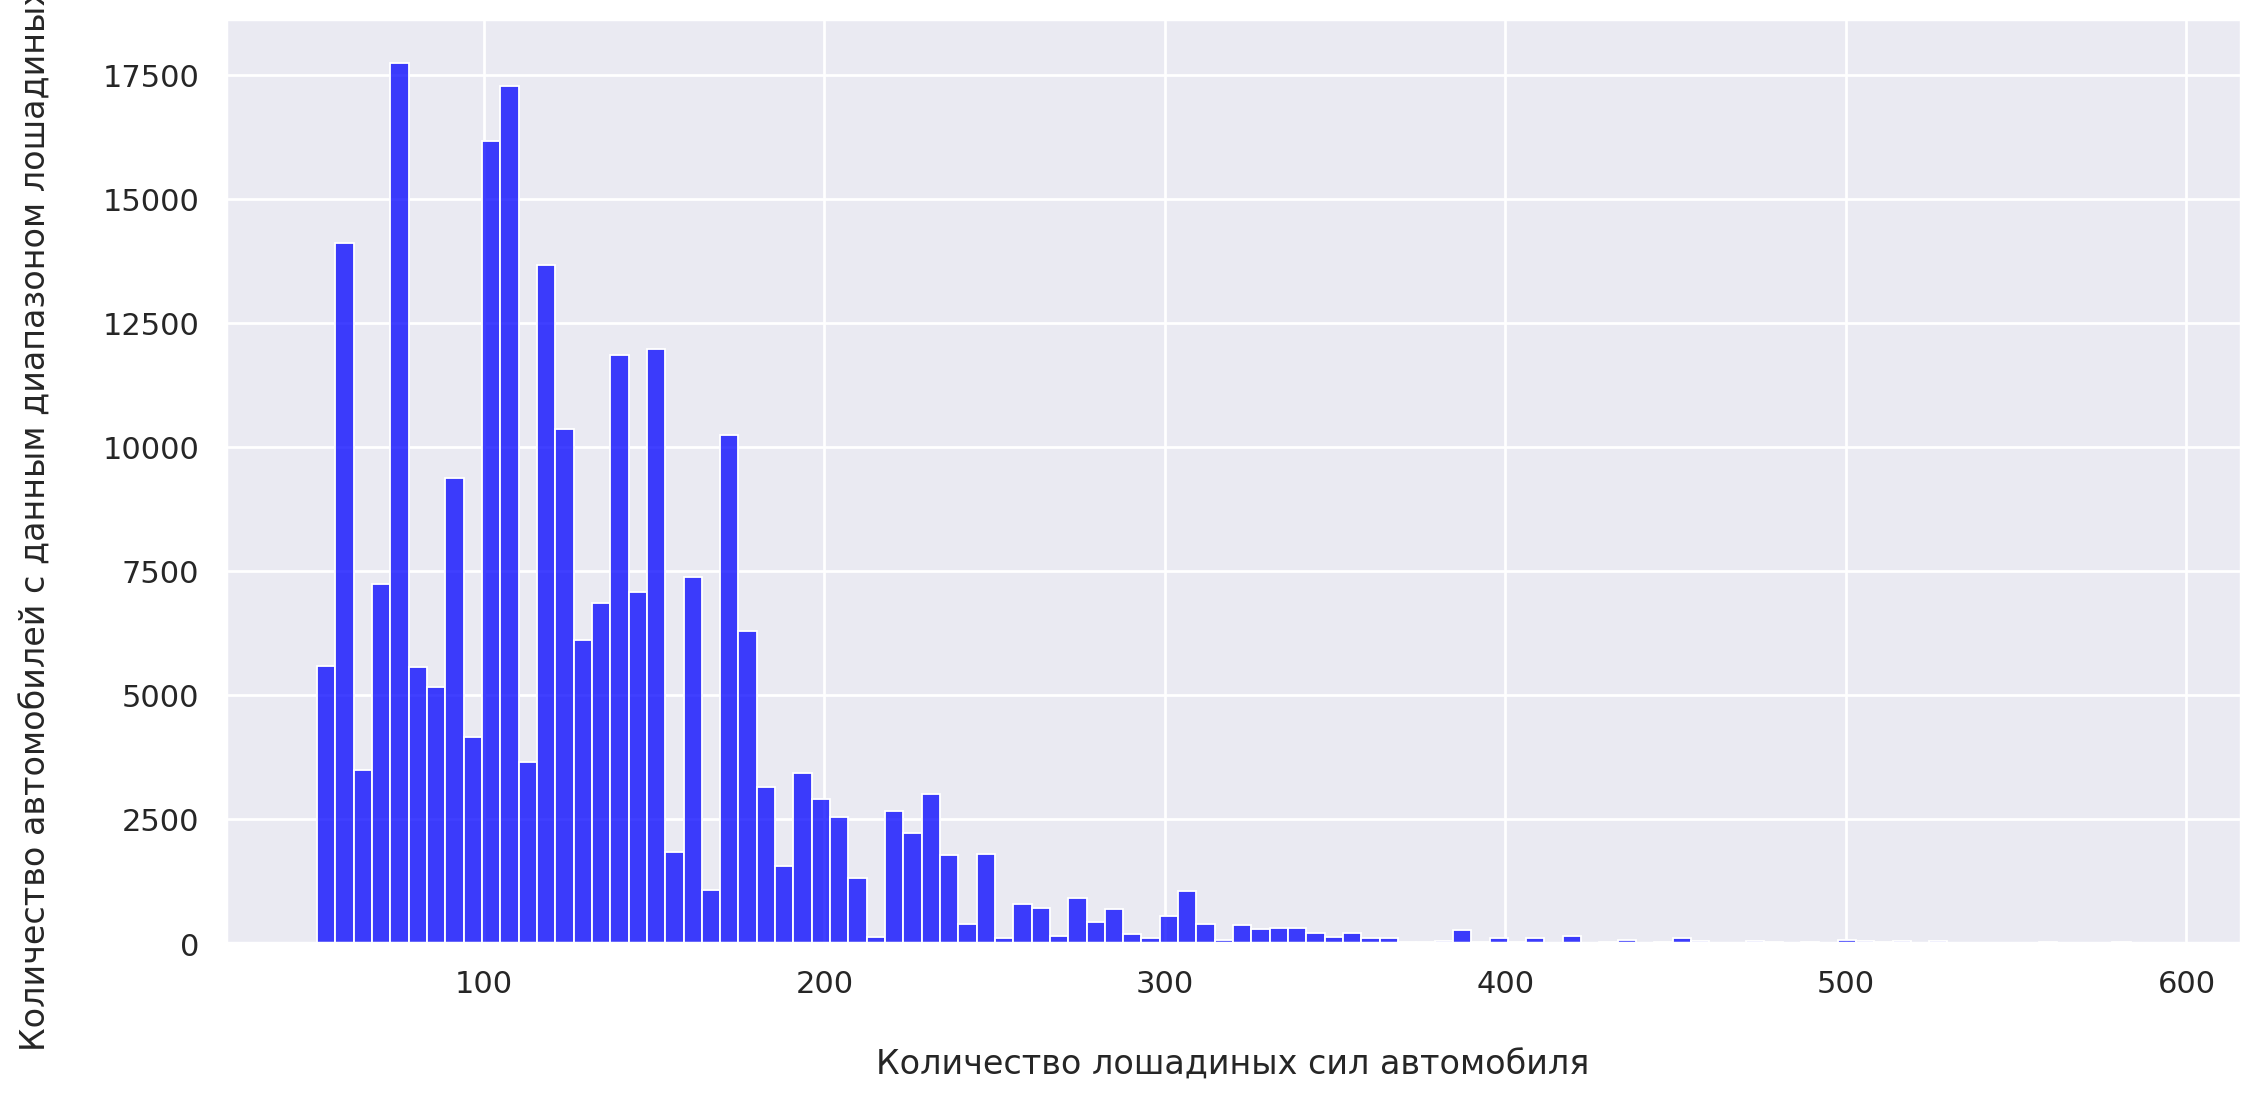

In [ ]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.histplot(x = data_masked['powerPS'], ax = ax, color = 'blue', bins = 100)
ax.set_xlabel('\nКоличество лошадиных сил автомобиля')
ax.set_ylabel('Количество автомобилей с данным диапазоном лошадиных сил\n')
plt.show()

**Строим зависимость целевой переменной от пробега**

График 1: Зависимость среднего значения логарифма цены от пробега

График 2: График распределения значений признака

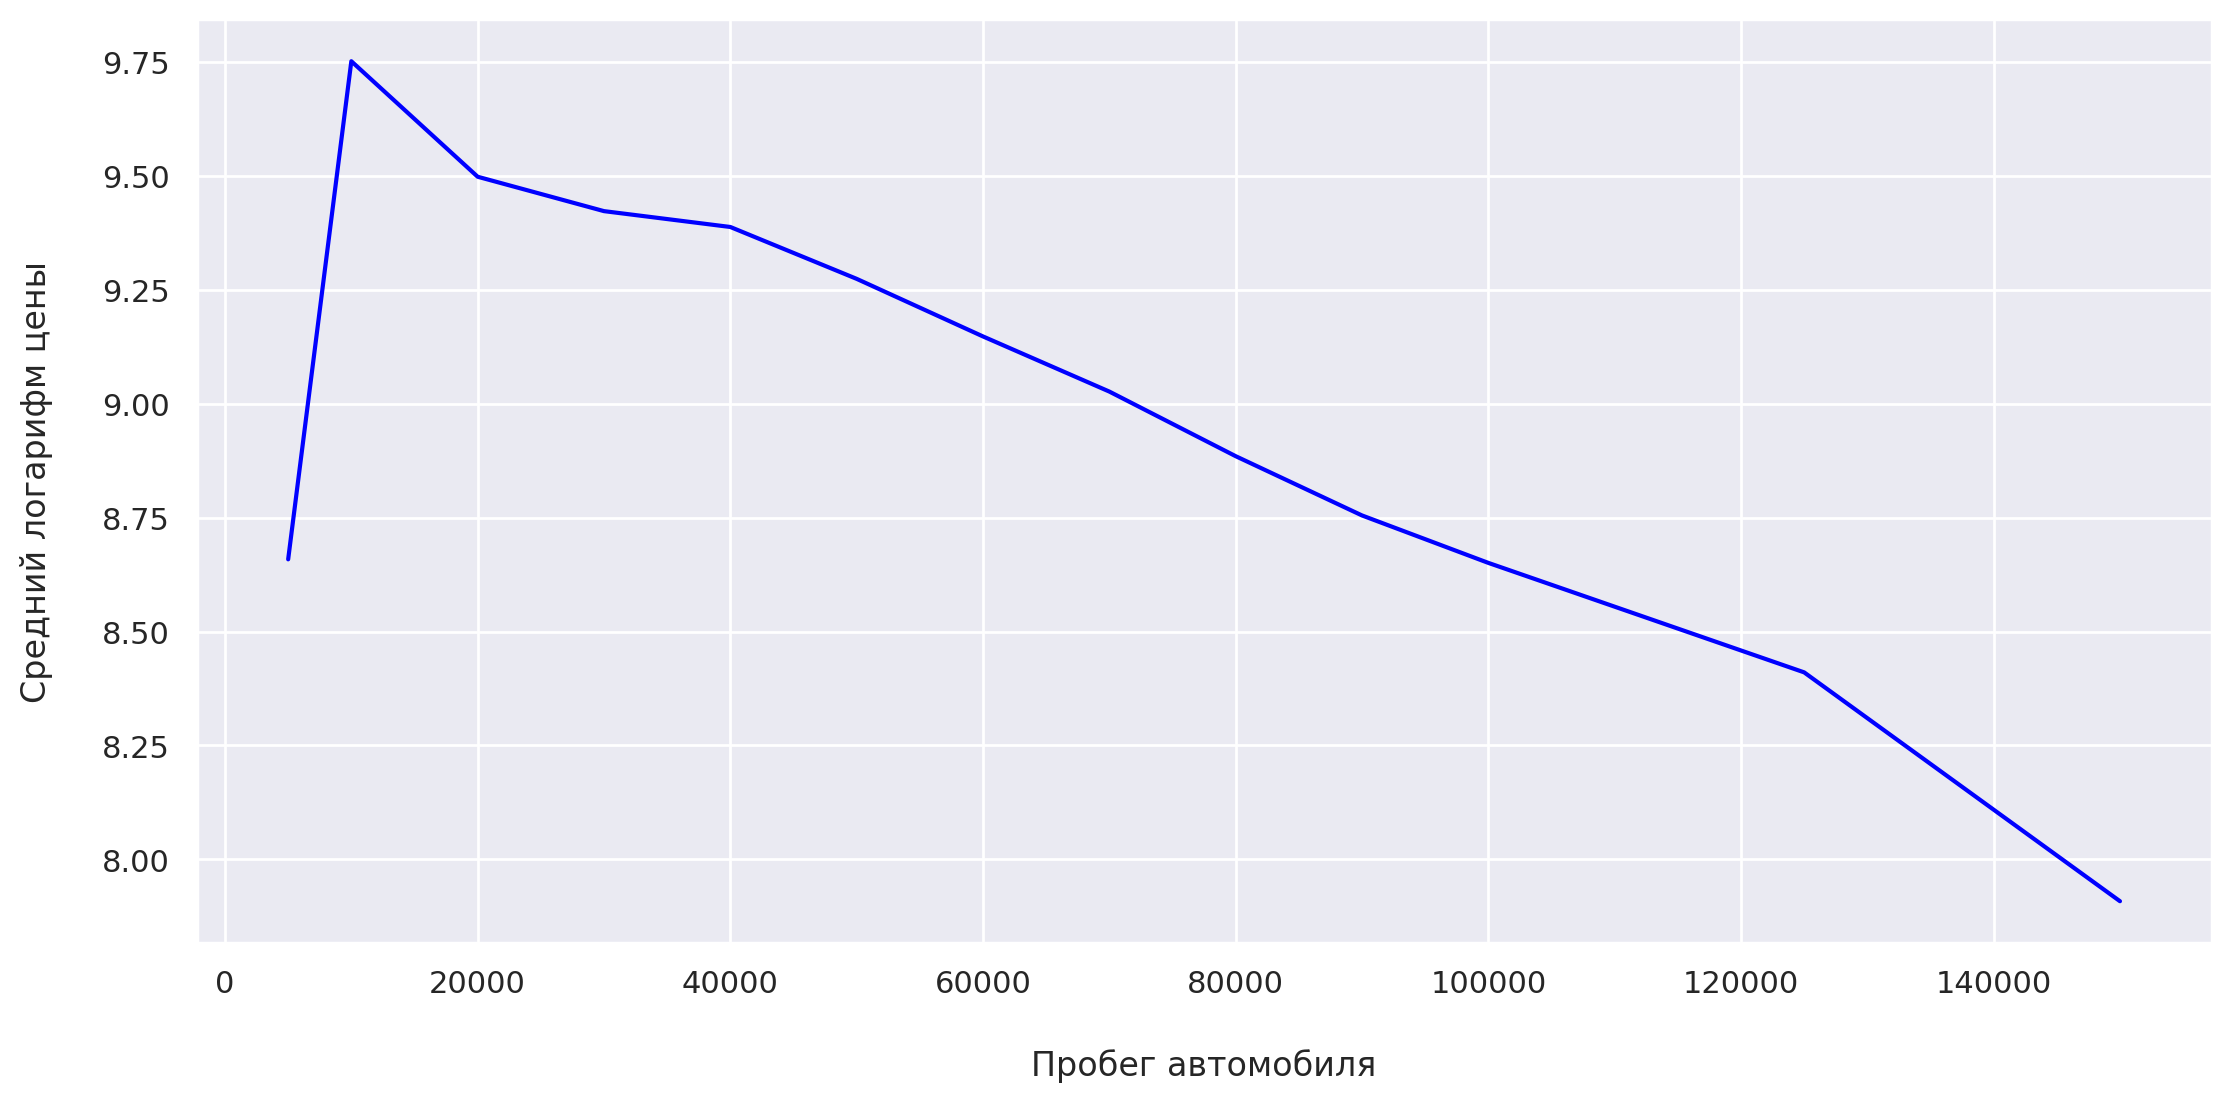

In [ ]:
kilometer_price = data_masked.groupby('kilometer')['log_price'].mean()
fig, ax = plt.subplots(figsize = (13, 6))
sns.lineplot(kilometer_price, color = 'blue')
ax.set_xlabel('\nПробег автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

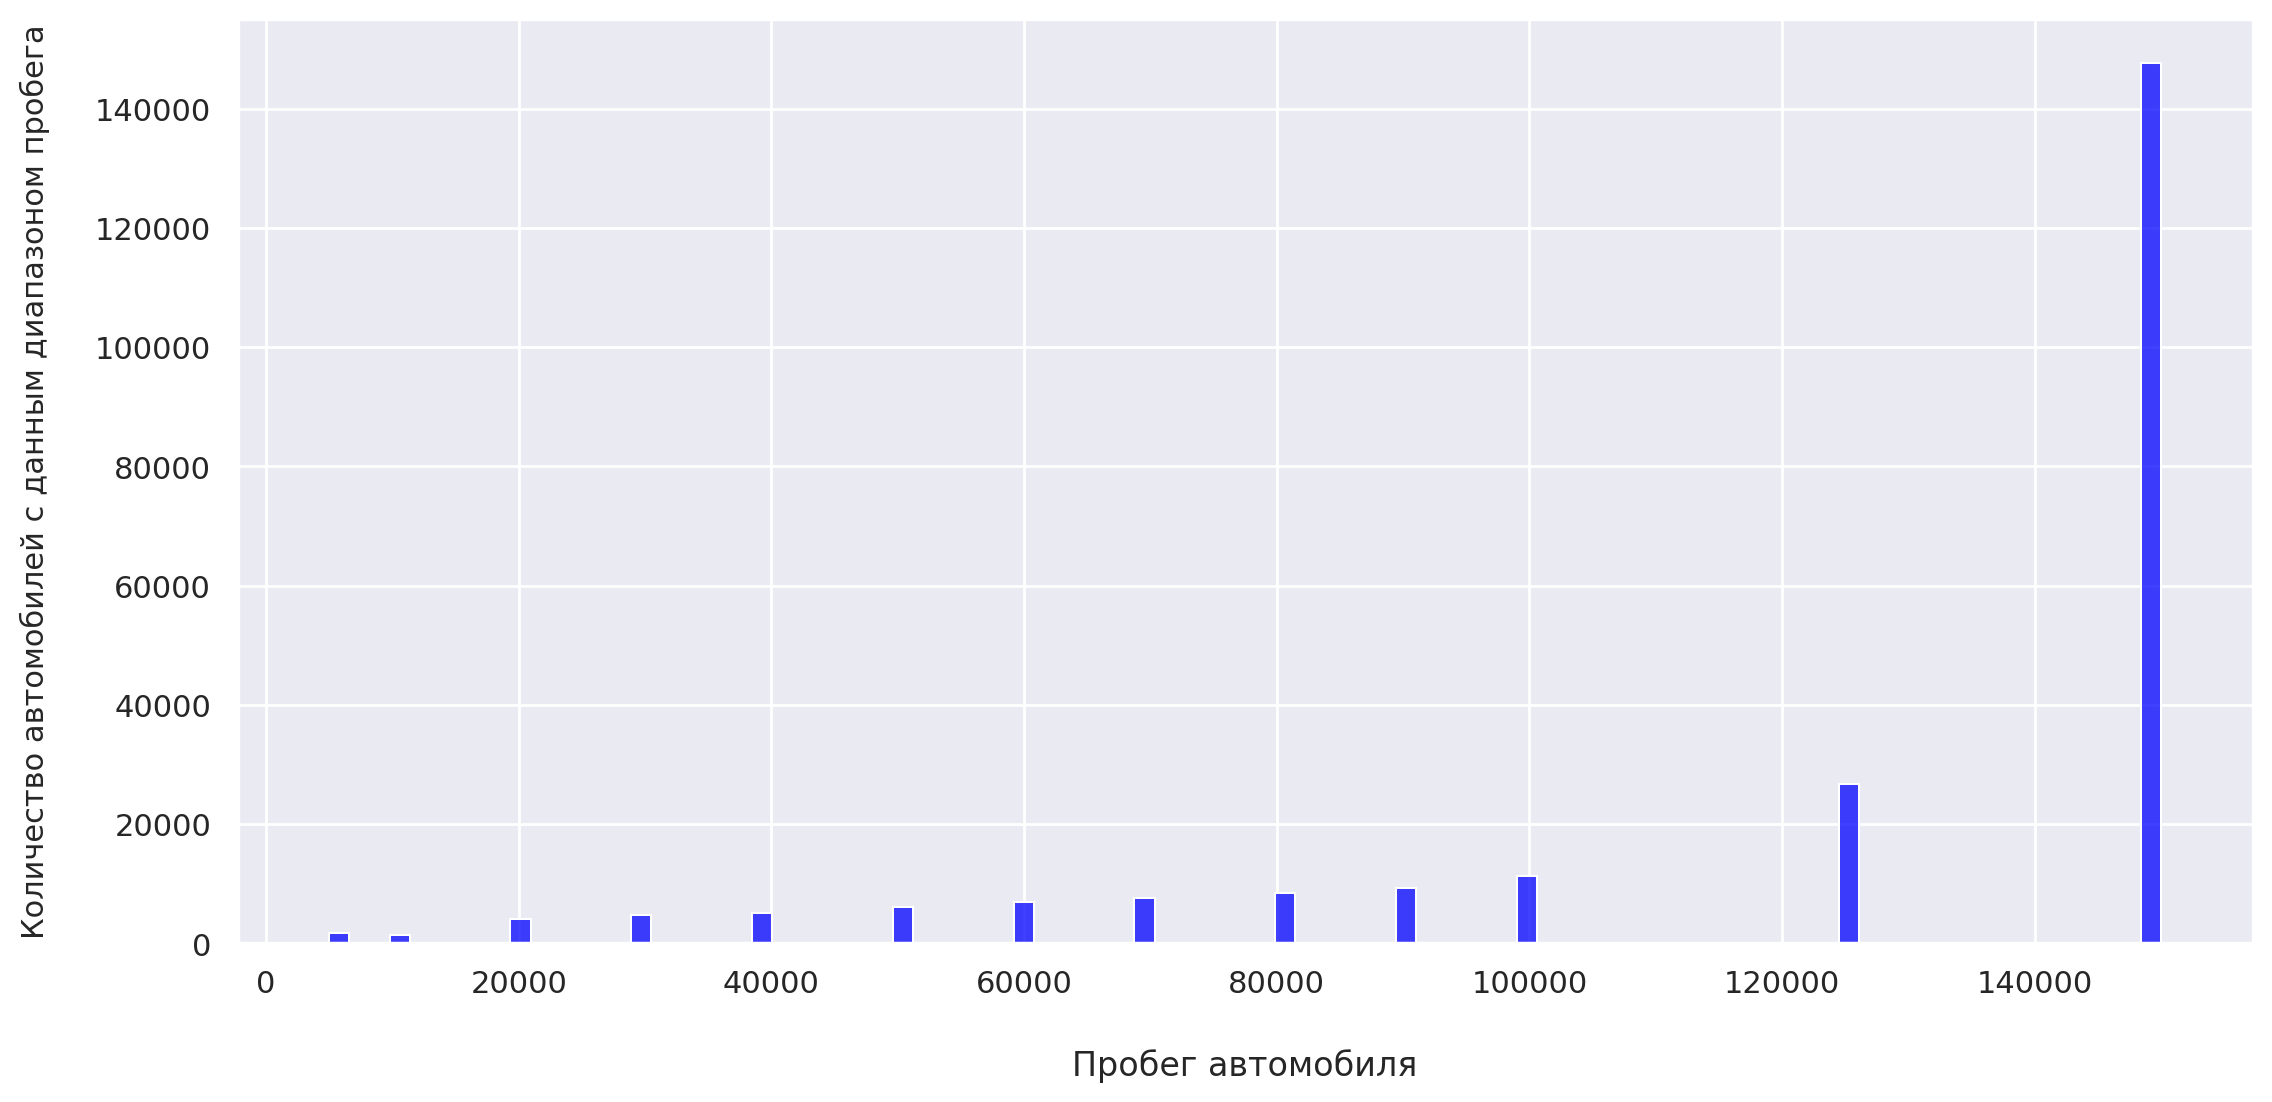

In [ ]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.histplot(x = data_masked['kilometer'], ax = ax, color = 'blue')
ax.set_xlabel('\nПробег автомобиля')
ax.set_ylabel('Количество автомобилей с данным диапазоном пробега\n', fontsize = 11)
plt.show()

**Строим зависимость целевой переменной от возраста автомобиля**

График 1: Зависимость среднего значения логарифма цены от возраста автомобиля

График 2: График распределения значений признака

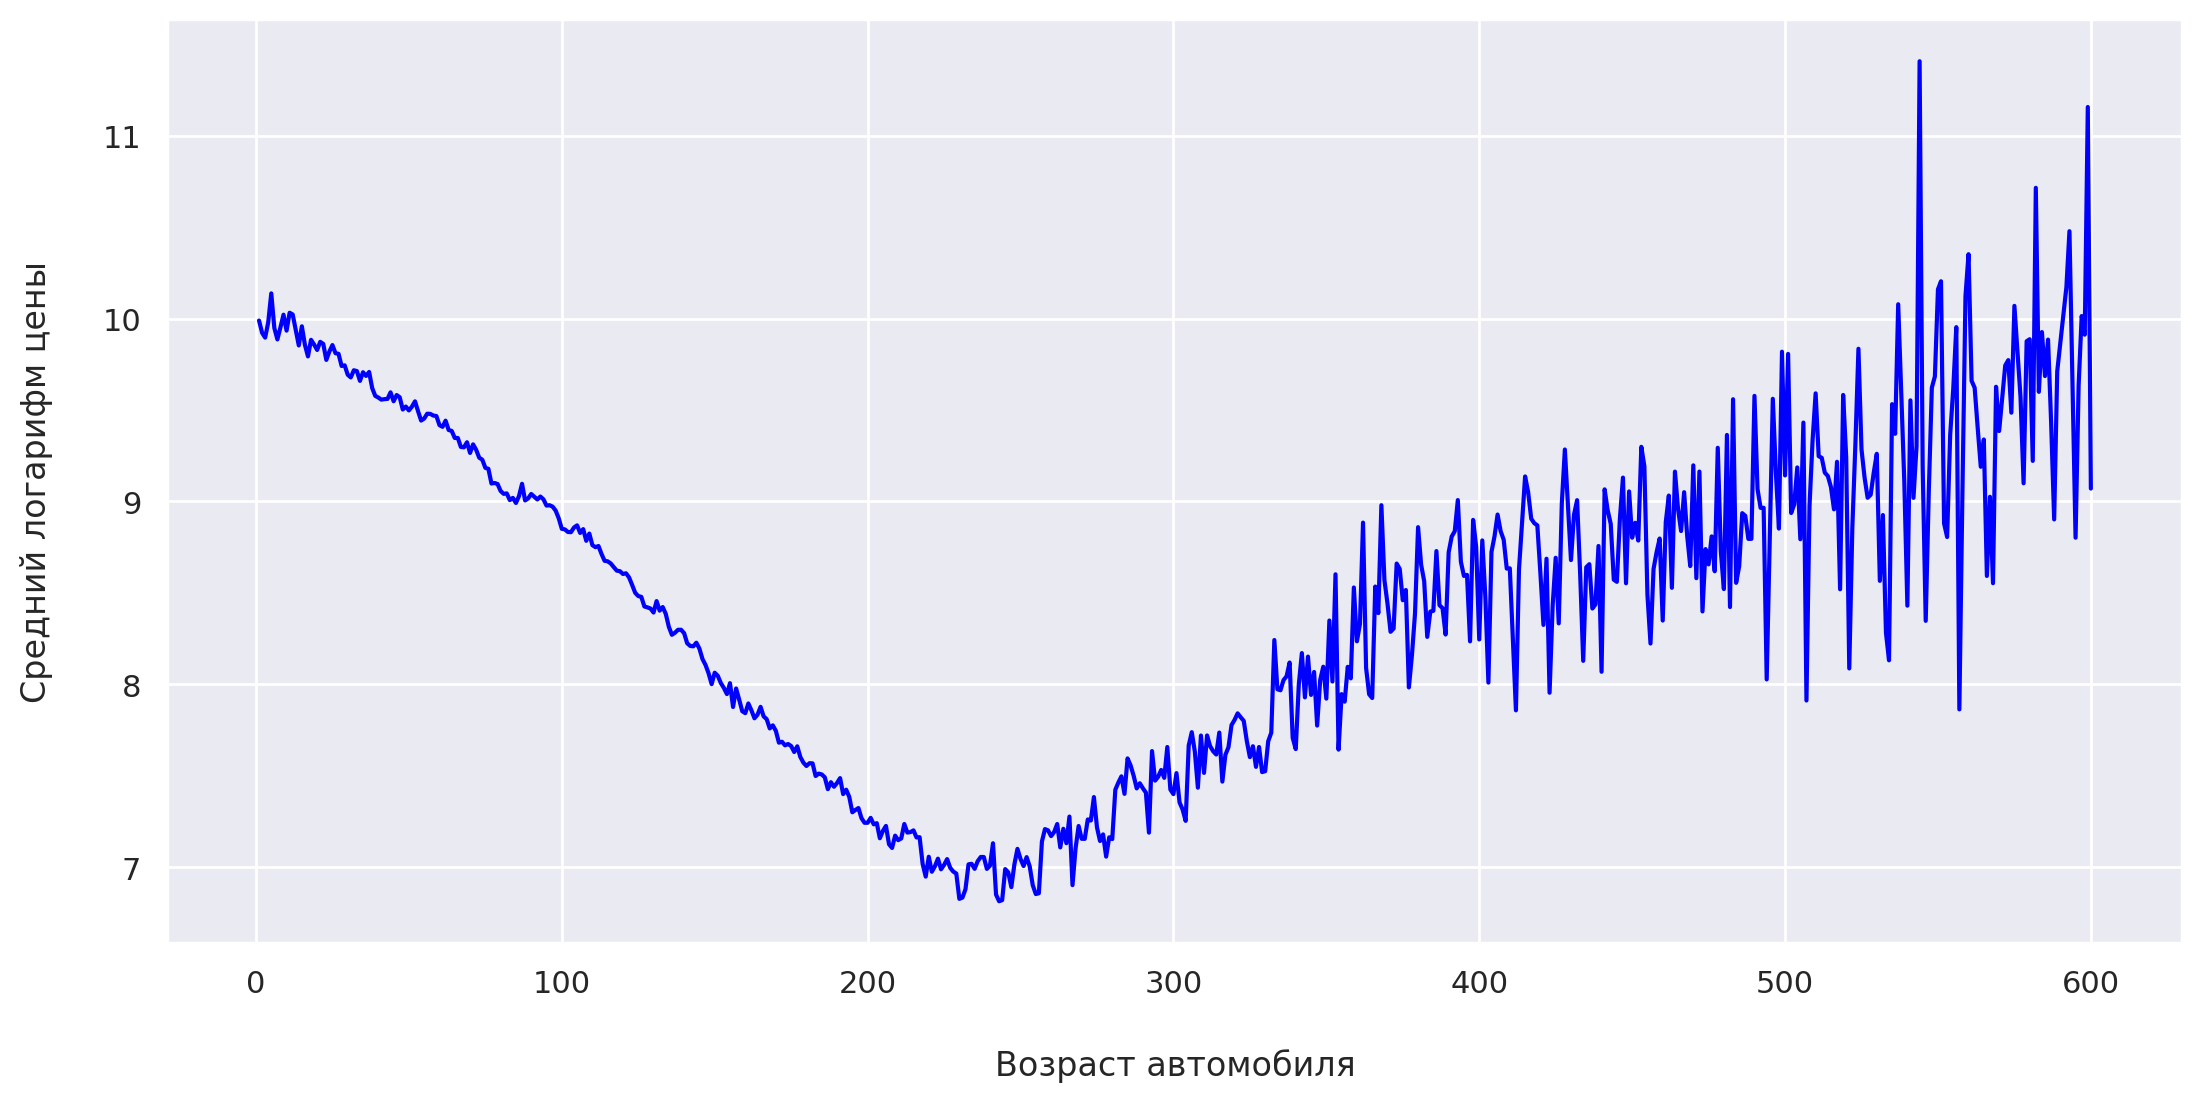

In [ ]:
age_price = data_masked.groupby('autoAgeMonths')['log_price'].mean()
fig, ax = plt.subplots(figsize = (13, 6))
sns.lineplot(age_price, color = 'blue')
ax.set_xlabel('\nВозраст автомобиля')
ax.set_ylabel('Средний логарифм цены\n')
plt.show()

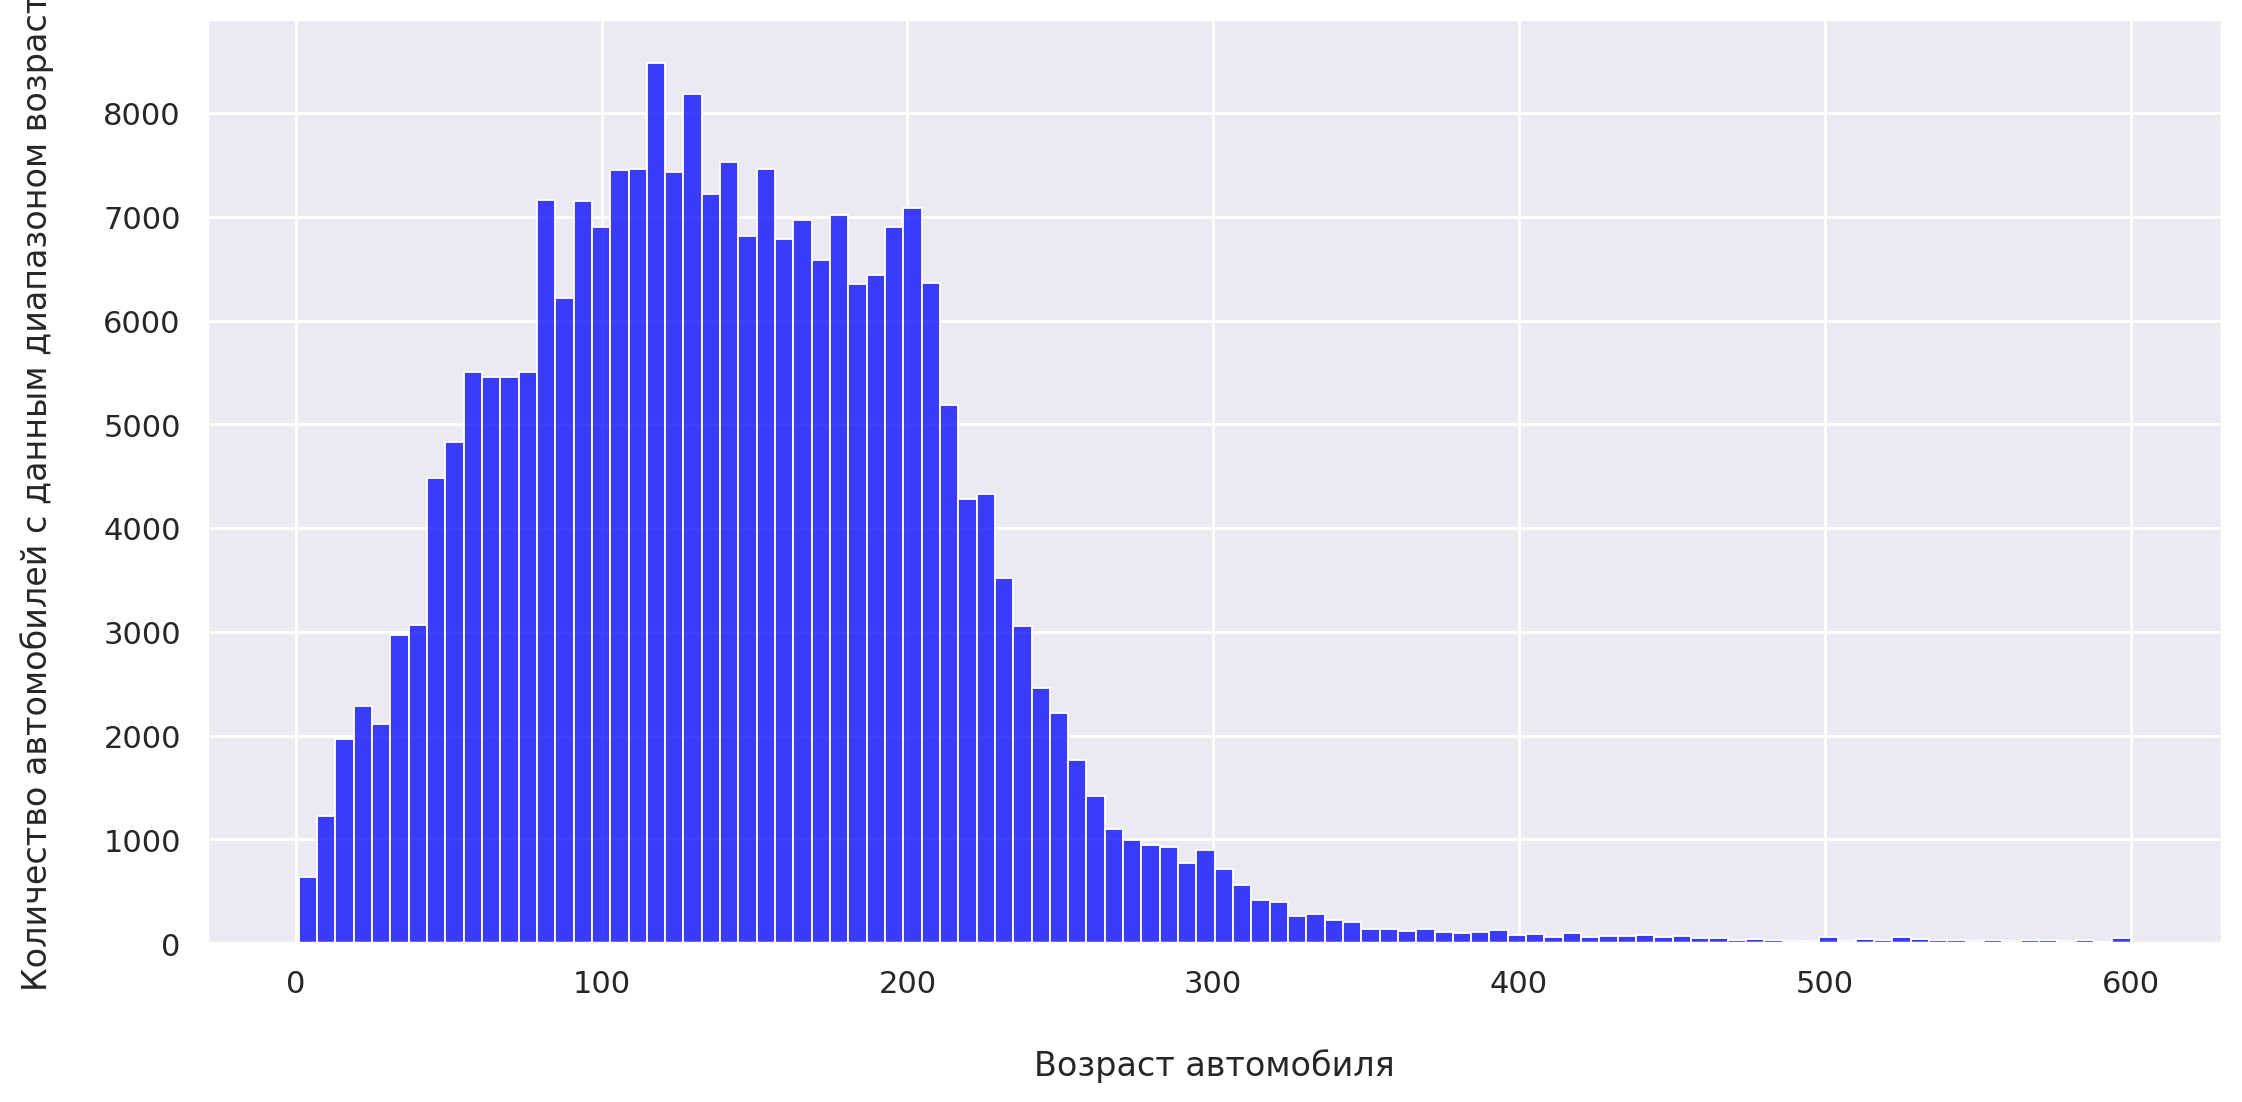

In [ ]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.histplot(x = data_masked['autoAgeMonths'], ax = ax, color = 'blue', bins = 100)
ax.set_xlabel('\nВозраст автомобиля')
ax.set_ylabel('Количество автомобилей с данным диапазоном возраста\n')
plt.show()

Я решил не брать бренд автомобиля, поскольку из распределения среднего значения логарифма целевой переменной видно, что для брендов их значения примерно одинаковые. Поэтому скорее всего они слабо скоррелированны с целевой переменной. Помимо этого, один и тот же бренд может содержать как экономные, так и премиальные модели, чего не будет знать наша модель, ведь она смотрит на среднее, что тоже плохо для предсказаний.

Тип топлива и тип автомобиля также являются бесполезными признаками, поскольку независимо от значения этих признаков целевая переменная в целом одна и та же, а потому их корреляция слабая и мы лучше не будем усложнять нашу модель.

Модель, как мне кажется, отличный признак, поскольку представителей каждой из них больше 100 точно, а соответственно, маловероятно, что в рамках одной модели автомобиля у нас будут только выбросы, которые потом будут плохо влиять на предсказание регрессии на тесте. Помимо этого, цены по разным моделям разные, поэтому этот признак хороший. Единственная проблема - порождает много признаков при OHE, но модель зато будет хорошо предсказывать.

Коробка передач и урон - хорошие признаки, потому что там видна явная разница в цене в зависимости от значения.

В числовых признаках все признаки хорошие и адекватно распределенные, поэтому они хорошо помогут модели обучиться.

Уместно будет применить OHE, масштабирование числовых признаков. Также закодируем бинарные признаки через 0 и 1.

In [ ]:
#f = data_masked.groupby('model')['price'].mean()
#models = list(f.index)
#models_and_means = dict(zip(models, f))
#print(f)
#print(models_and_means)
#for key, value in models_and_means.items():
# list_of_indexes = list(data_masked[data_masked['model'] == key].index)
# data_masked = data_masked[(abs(data_masked.loc[list_of_indexes, 'model'] - value)/value <= 0.3) | ~data_masked.loc[list_of_indexes]]

In [ ]:
categorical = ['model']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['notRepairedDamage', 'gearbox']

# YOUR CODE (EDA):
#Теперь удалим выбросы из наших признаков:
data = data[mask]
mask1 = data['powerPS'] < np.percentile(data['powerPS'], 99.5)
data = data[mask1]
mask2 = data['autoAgeMonths'] < np.percentile(data['autoAgeMonths'], 99)
data = data[mask2]
data.loc[data['notRepairedDamage'] == 'ja', 'notRepairedDamage'] = 1
data.loc[~(data['notRepairedDamage'] == 'ja'), 'notRepairedDamage'] = 0
data.loc[data['gearbox'] == 'automatik', 'gearbox'] = 1
data.loc[~(data['gearbox'] == 'automatik'), 'gearbox'] = 0

In [ ]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [ ]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split
x_train, x_big_test, y_train, y_big_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_val, x_test, y_val, y_test = train_test_split(x_big_test, y_big_test, test_size=0.5, random_state=10)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [ ]:
# YOUR CODE:
lambdas = np.logspace(-2, 1, 30)
list_of_loss = []
best_lambda = []
all_best_lambdas = []
lowest_losses = []
descent_configuration = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 1e-3
    }
}
for descent_name in ['full', 'stochastic', 'momentum','adam']:
  descent_configuration['descent_name'] = descent_name
  for i in range(30):
    descent_configuration['kwargs']['lambda_'] = lambdas[i]
    model_regr = LinearRegression(descent_configuration)
    model_regr.fit(x_train, y_train.reset_index(drop = True))
    list_of_loss.append(model_regr.calc_loss(x_val, y_val))
    best_lambda.append(lambdas[i])
    if len(list_of_loss) != 1:
      if list_of_loss[1] <= list_of_loss[0]:
        del list_of_loss[0]
        del best_lambda[0]
      else:
        del list_of_loss[1]
        del best_lambda[1]
    if i == 29:
      all_best_lambdas.append(best_lambda[0])
      lowest_losses.append(list_of_loss[0])
      del list_of_loss[0]
      del best_lambda[0]
print('Лучшие лямбды по full, stochastic, momentum и adam соответственно: ', [all_best_lambdas])
print('Минимальные ошибки по full, stochastic, momentum и adam соответственно:', [lowest_losses])

Лучшие лямбды по full, stochastic, momentum и adam соответственно:  [[3.856620421163472, 1.1721022975334805, 2.395026619987486, 0.5736152510448679]]
Минимальные ошибки по full, stochastic, momentum и adam соответственно: [[0.3048597466188085, 0.33363034914393497, 0.26969275442883633, 0.26265140139701654]]


In [ ]:
from sklearn.metrics import r2_score
dict_of_test_r2score_losses = {}
dict_of_train_r2score_losses = {}
dict_of_lens_of_losses = {}
dict_of_histories_of_losses = {}
dict_of_test_MSE_losses = {}
dict_of_train_MSE_losses = {}
for iteration, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
  descent_configuration['descent_name'] = descent_name
  descent_configuration['kwargs']['lambda_'] = all_best_lambdas[iteration]
  model_regr = LinearRegression(descent_configuration)
  model_regr.fit(x_train, y_train.reset_index(drop = True))
  dict_of_histories_of_losses[descent_name] = model_regr.loss_history
  dict_of_lens_of_losses[descent_name] = (len(model_regr.loss_history) - 1)
  dict_of_test_MSE_losses[descent_name] = (model_regr.calc_loss(x_test, y_test))
  dict_of_train_MSE_losses[descent_name] = (model_regr.calc_loss(x_train, y_train))
  dict_of_test_r2score_losses[descent_name] = r2_score(y_test, model_regr.predict(x_test))
  dict_of_train_r2score_losses[descent_name] = r2_score(y_train, model_regr.predict(x_train))

### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

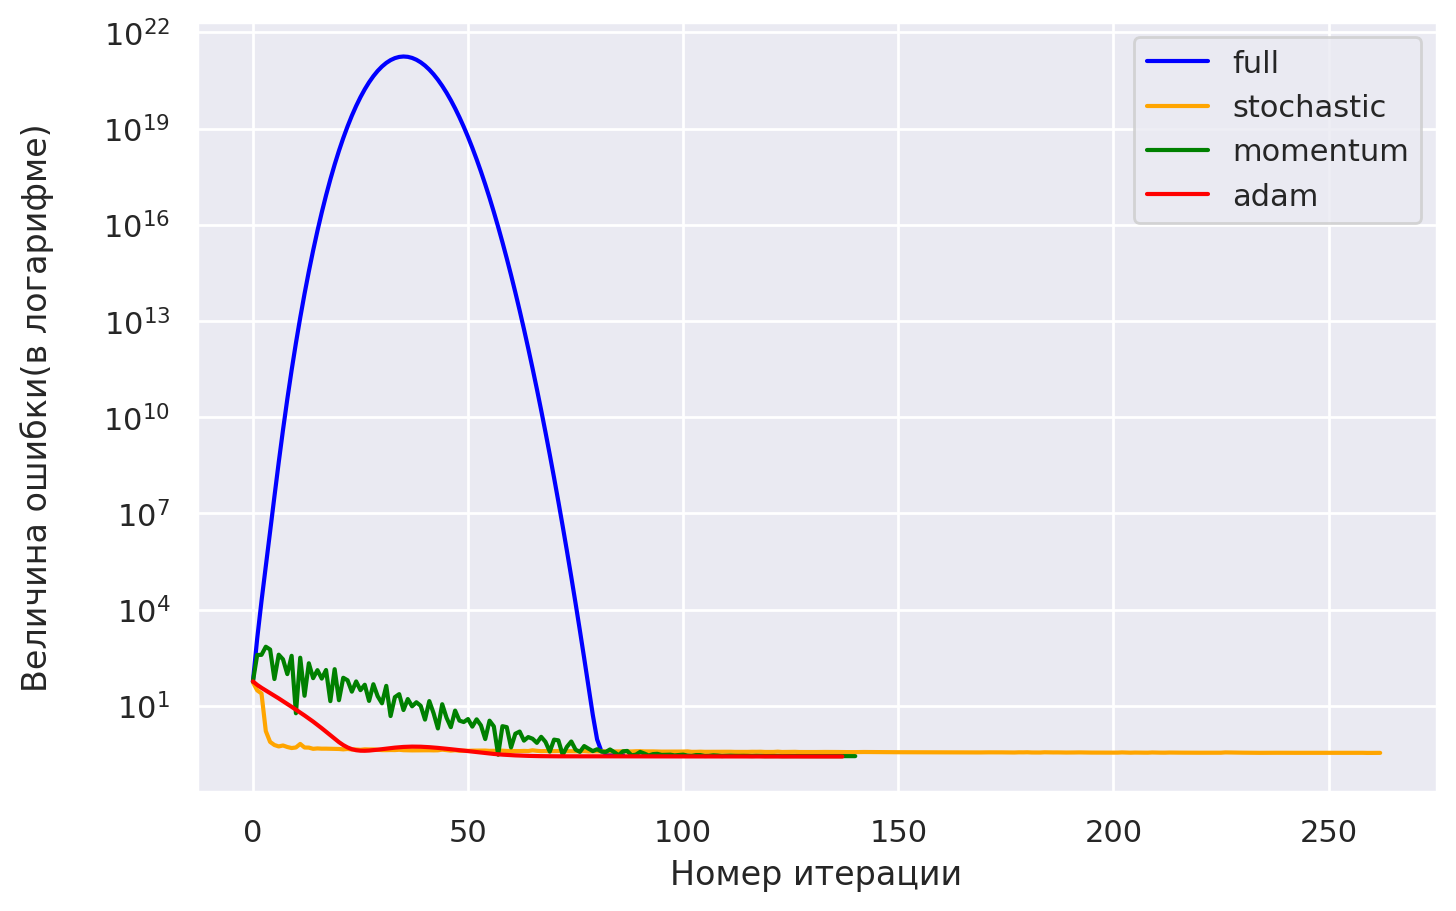

In [ ]:
# YOUR CODE:
fig, ax = plt.subplots()
colors = ['blue', 'orange', 'green', 'red']
for (name, values), color in zip(dict_of_histories_of_losses.items(), colors):
    sns.lineplot(values, label=name, color=color)
ax.set_yscale('log')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Величина ошибки(в логарифме)\n')
ax.legend()
plt.show()

In [ ]:
list_of_dicts = [dict_of_train_MSE_losses, dict_of_train_r2score_losses, dict_of_test_MSE_losses,
                 dict_of_test_r2score_losses,
                 dict_of_lens_of_losses]
metrics_df = pd.DataFrame(list_of_dicts, index = ['MSE_train', 'r2score_train', 'MSE_test', 'r2score_test', 'iter_len'])
metrics_df

full  stochastic    momentum        adam
MSE_train       0.314497    0.339664    0.268438    0.261794
r2score_train   0.747488    0.727281    0.784469    0.789804
MSE_test        0.312204    0.333820    0.268781    0.263483
r2score_test    0.752148    0.734987    0.786620    0.790826
iter_len       86.000000  262.000000  140.000000  137.000000

Как мы видим, полный градиентный спуск сходится к минимуму быстрее всех, что довольно логично, поскольку он считает полный градиент и всегда точно направлен в сторону минимума. При этом, сначала ошибка росла поскольку шаг спуска был выбран довольно большой и модель в начале разошлась, однако в итоге он приводит к тому, что мы сзодимся к довольно хорошему минимуму.

Заметим также, что стохастический градиентный спуск выдает наиболее плохие метрические показатели, а также сходился к минимуму дольше всех, поскольку он всегда берет случайную выборку, и ему нужно больше времени на то, чтобы сойтись к минимуму, ведь уменьшая ошибку на выборке, он может ее увеличивать на всей совокупности в целом. Плохие метрические показатели также связаны с тем, что, во-первых, стохастический градиент не успел сойтись по разнице весов (у него просто закончилась возможность итераций), во-вторых, поскольку каждый раз выбиралась случайная выборка, данный градиентный спуск не мог оценить всю совокупность целиком и пропустить определенные закономерности, поэтому такой результат.

Моментум очень сильно колеблется и дает средний показатель скорее всего из-за того, что LR довольно большой, что может заставлять нашу модель перепрыгивать через минимумы. К тому же, альфа тоже выбрана довольно большой, что может приводить к большому весу предыдущих градиентов, которые были довольно большими. Тем не менее, моментум не разошелся как полный градиентный спуск, поскольку он учитывал предыдущие градиенты, которые позволяли нивелировать направления в сторону от минимума.

Адам, как объединение всех методов очень хорош и показывает лучшие результаты.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time
batch_sizes = np.arange(5, 500, 10)
times_in_seconds = []
len_of_loss_for_batch = []
mean_of_seconds = []
mean_of_iterations = []
descent_conf = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': x_train.shape[1],
        'batch_size': int,
        'lambda_': all_best_lambdas[1]
    }
}
# YOUR CODE:
for i in range (len(batch_sizes)):
  for j in range(10):
    start_time = time.time()
    descent_conf['kwargs']['batch_size'] = batch_sizes[i]
    model_stoch = LinearRegression(descent_conf)
    model_stoch.fit(x_train, y_train.reset_index(drop = True))
    len_of_loss_for_batch.append(len(model_stoch.loss_history) - 1)
    end_time = time.time()
    overall_time = end_time - start_time
    times_in_seconds.append(overall_time)
  mean_of_iterations.append(sum(len_of_loss_for_batch) / (len(len_of_loss_for_batch)))
  mean_of_seconds.append(sum(times_in_seconds) / len(times_in_seconds))
  len_of_loss_for_batch.clear()
  times_in_seconds.clear()


In [ ]:
mean_of_iterations

[296.6,
 300.0,
 300.0,
 299.5,
 296.0,
 295.4,
 294.7,
 255.1,
 263.3,
 237.3,
 210.5,
 199.5,
 208.1,
 205.5,
 178.4,
 183.0,
 178.5,
 165.4,
 166.3,
 155.3,
 139.4,
 135.9,
 144.0,
 146.2,
 132.3,
 127.7,
 128.5,
 115.3,
 120.1,
 124.3,
 127.9,
 119.8,
 109.3,
 120.0,
 113.0,
 109.5,
 111.1,
 109.8,
 109.3,
 103.0,
 111.8,
 95.2,
 109.3,
 99.4,
 101.9,
 95.1,
 95.1,
 93.7,
 91.2,
 89.5]

In [ ]:
mean_of_seconds

[1.344980525970459,
 1.2790348768234252,
 1.2775078773498536,
 1.288733673095703,
 1.2589372873306275,
 1.2386654615402222,
 1.2660017251968383,
 1.1464685440063476,
 1.1833523035049438,
 1.077827477455139,
 0.885181999206543,
 0.8816840171813964,
 0.9401116371154785,
 0.8625298023223877,
 1.2264119386672974,
 1.1990658521652222,
 0.8240714550018311,
 0.658714747428894,
 0.7788414478302002,
 0.6330580711364746,
 0.6643945693969726,
 0.5721826314926147,
 0.7094533205032348,
 0.5941953420639038,
 0.6715017557144165,
 0.5272628784179687,
 0.5964806079864502,
 0.601871395111084,
 0.4909728288650513,
 0.6902829885482789,
 0.5613996744155884,
 0.5966408967971801,
 0.4454228401184082,
 0.5139395713806152,
 0.5400717496871948,
 0.4840064764022827,
 0.5550977230072022,
 0.4626994371414185,
 0.45388748645782473,
 0.5346748352050781,
 0.45365309715270996,
 0.3841801643371582,
 0.5668925523757935,
 0.43440995216369627,
 0.43226478099822996,
 0.5118898868560791,
 0.3947897911071777,
 0.407624077796

Text(0, 0.5, 'Среднее количество итераций до сходимости\n')

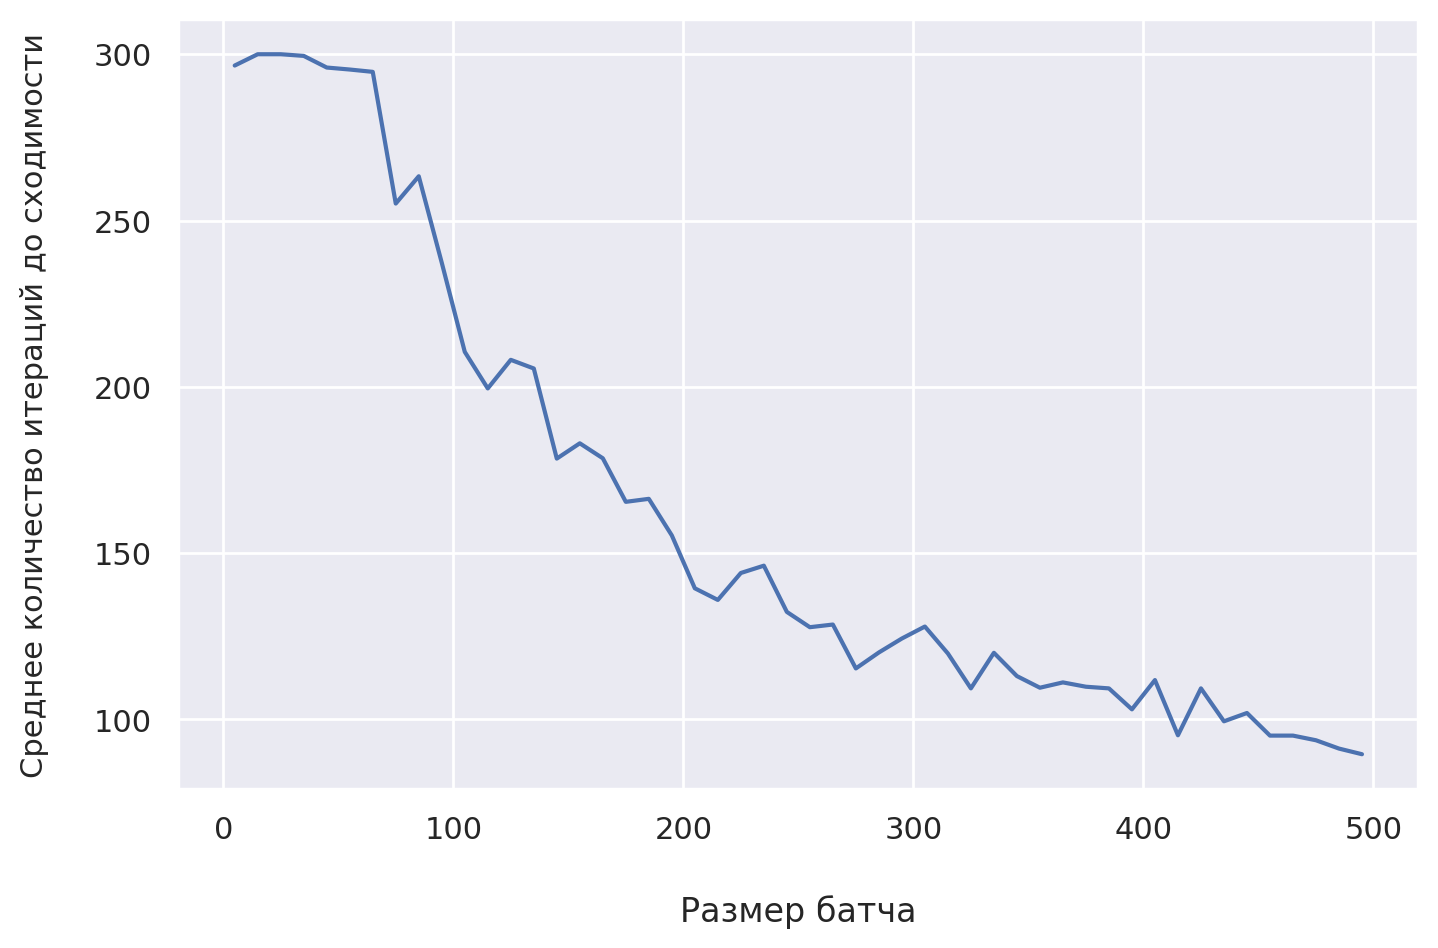

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x = batch_sizes, y = mean_of_iterations)
ax.set_xlabel('\nРазмер батча')
ax.set_ylabel('Среднее количество итераций до сходимости\n', fontsize = 11)

Text(0, 0.5, 'Среднее секунд для минимизации\n')

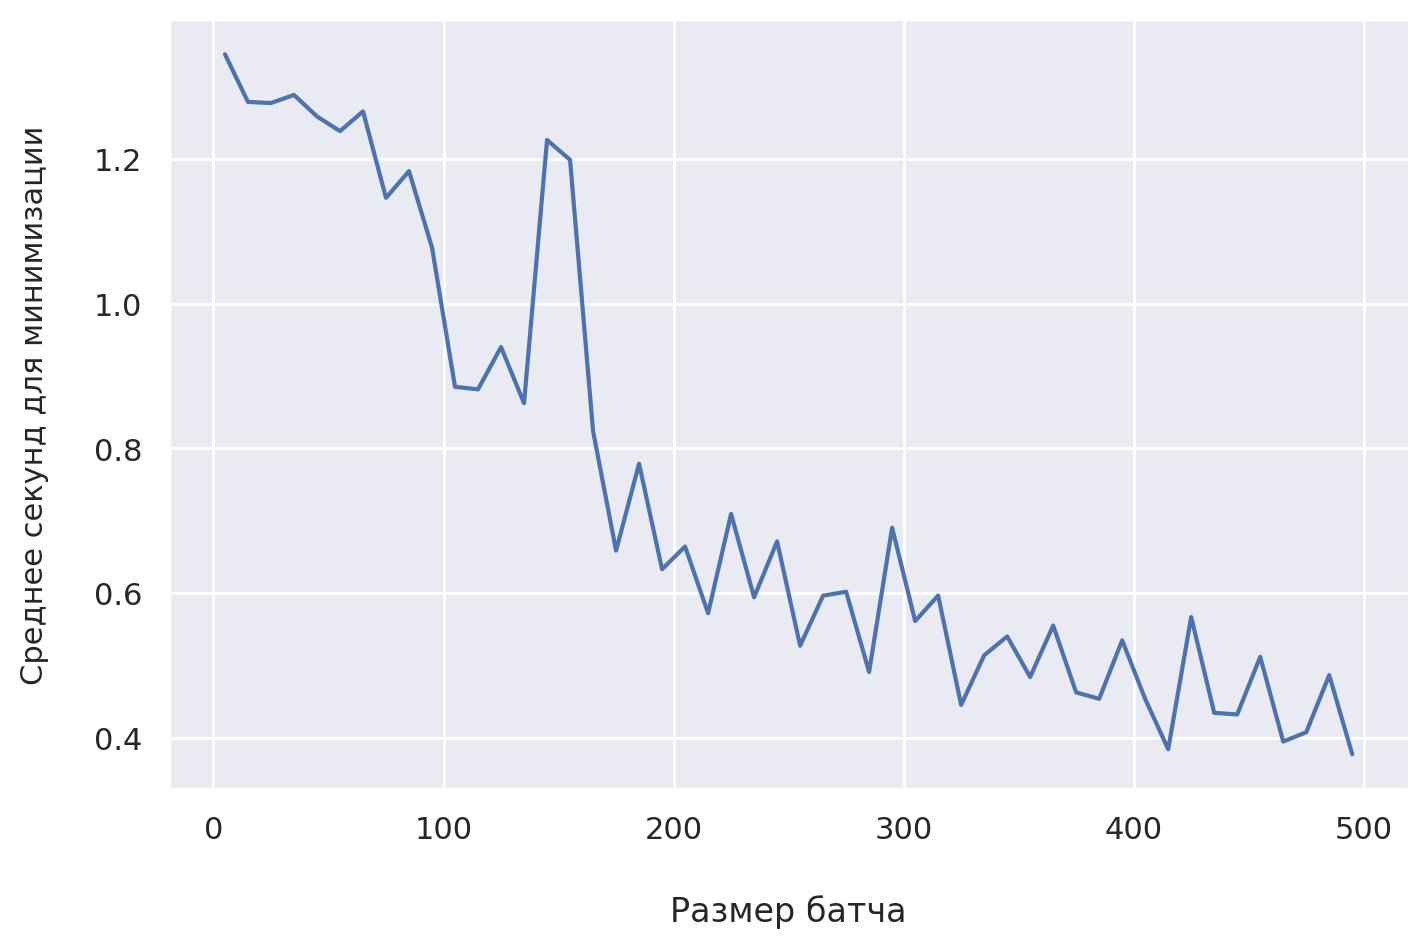

In [ ]:
fig, ax = plt.subplots()
sns.lineplot(x = batch_sizes, y = mean_of_seconds)
ax.set_xlabel('\nРазмер батча')
ax.set_ylabel('Среднее секунд для минимизации\n', fontsize = 11)

Из графиков приходит логичный вывод, что чем больше размер батча - тем более быстро сходится модель, поскольку лучше понимает куда идти в сторону минимума рядом с минимумом, поскольку выборка больше и учитывается совокупность. Время немного колеблится, потому что с одной стороны, быстрее сходится, а с другой - нужно больше градиентов считать. Как бы такой трейдофф.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [ ]:
# YOUR CODE:
new_lambdas = np.logspace(-3, 1, 10)
mus = np.logspace(-3, 1, 10)
list_of_losses = []
general_list_of_losses = []
best_lambdas = []
general_list_of_lambda = []
best_mu = []
all_best_mu = []
all_best_lambda = []
lowest_loss = []
descent_configuration = {
    'descent_name': 'some name that we will replace in the future',
    'regularized': True,
    'kwargs': {
        'dimension': x_train.shape[1],
        'lambda_': 1e-3,
        'mu': 1e-2
    }
}
for descent_name in ['full', 'stochastic', 'momentum','adam']:
  descent_configuration['descent_name'] = descent_name
  for i in range(10):
    descent_configuration['kwargs']['mu'] = mus[i]
    for j in range(10):
      descent_configuration['kwargs']['lambda_'] = new_lambdas[j]
      model_regression = LinearRegression(descent_configuration)
      model_regression.fit(x_train, y_train.reset_index(drop = True))
      list_of_losses.append(model_regression.calc_loss(x_val, y_val))
      best_lambdas.append(new_lambdas[j])
      if len(list_of_losses) != 1:
        if list_of_losses[1] <= list_of_losses[0]:
          del list_of_losses[0]
          del best_lambdas[0]
        else:
          del list_of_losses[1]
          del best_lambdas[1]
      if j == 9:
        general_list_of_lambda.append(best_lambdas[0])
        general_list_of_losses.append(list_of_losses[0])
        del list_of_losses[0]
        del best_lambdas[0]
    best_mu.append(mus[i])
    if len(general_list_of_losses) != 1:
      if general_list_of_losses[1] <= general_list_of_losses[0]:
        del best_mu[0]
        del general_list_of_losses[0]
        del general_list_of_lambda[0]
      else:
        del best_mu[1]
        del general_list_of_losses[1]
        del general_list_of_lambda[1]
    if i == 9:
      lowest_loss.append(general_list_of_losses[0])
      all_best_mu.append(best_mu[0])
      all_best_lambda.append(general_list_of_lambda[0])
print('Лучшие лямбды по full, stochastic, momentum и adam соответственно: ', [all_best_lambda])
print('Лучшие mu по full, stochastic, momentum и adam соответственно:', [all_best_mu])
print('Минимальные ошибки по full, stochastic, momentum и adam соответственно:', [lowest_loss])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/content/linear_regression.py:47: RuntimeWarning: overflow encountered in square
  while (np.sum(d**2) >= self.tolerance) and (iteration_count < self.max_iter) and (not np.any(np.isnan(d))):
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encount

Лучшие лямбды по full, stochastic, momentum и adam соответственно:  [[3.593813663804626, 3.593813663804626, 1.2915496650148828, 10.0]]
Лучшие mu по full, stochastic, momentum и adam соответственно: [[0.001, 0.001, 0.001, 0.001]]
Минимальные ошибки по full, stochastic, momentum и adam соответственно: [[6.002048402910592, 6.002048402910592, 2.339634507494462, 1.2945627045528023]]


In [ ]:
from sklearn.metrics import r2_score
dict_of_test_r2score_loss = {}
dict_of_train_r2score_loss = {}
dict_of_lens_of_loss = {}
dict_of_test_MSE_losses = {}
dict_of_train_MSE_losses = {}
for iteration, descent_name in enumerate(['full', 'stochastic', 'momentum', 'adam']):
  descent_configuration['descent_name'] = descent_name
  descent_configuration['kwargs']['lambda_'] = all_best_lambda[iteration]
  descent_configuration['kwargs']['mu'] = all_best_mu[iteration]
  model_regr = LinearRegression(descent_configuration)
  model_regr.fit(x_train, y_train.reset_index(drop = True))
  dict_of_lens_of_losses[descent_name] = (len(model_regr.loss_history) - 1)
  dict_of_test_MSE_losses[descent_name] = (model_regr.calc_loss(x_test, y_test))
  dict_of_train_MSE_losses[descent_name] = (model_regr.calc_loss(x_train, y_train))
  dict_of_test_r2score_losses[descent_name] = r2_score(y_test, model_regr.predict(x_test))
  dict_of_train_r2score_losses[descent_name] = r2_score(y_train, model_regr.predict(x_train))

Скорее всего регуляризация ускорит сходимость, поскольку не опзволяет весам быть большими

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.



---


Для меня вайб осени - это готовить осенние салаты(не оливье или винегрет), но поскольку выдалось такое задание, то я решил попробовать себя в качестве шефа и решил выбрать приготовить своему другу сочный стейк из индейки с рисом с кукурузой (знаю, вам тоже уже захотелось его попробовать), ну и конечно же приготовить салат с курицей и грецким орехом. Почему из индейки? Потому что когда мне готовили индейку - она получалась супер сухой и ее невозможно было есть без каких либо соусов, поэтому я бросил себе вызов(кстати, получилось супер)

Для того, чтобы приготовить стейк, если у вас вдруг этого нет, то нужно купить филе индейки, оливковое масло, чеснок, тархун, соль и черный перец, а также довольно большой запас времени(это не надо покупать).

Что касается количества тех или иных ингридиентов:
- Рис - просто 2 пакетика риса
- Филе индейки — 2 куска
- Кукуруза - 2 столовые ложки
- Оливковое масло — 2-3 столовые ложки
- Соль — по вкусу
- Черный перец — по вкусу
- Тархун — 1-2 чайные ложки
- Чеснок — 2-3 зубчика

Теперь сам процесс готовки:
Этот рецепт я нашел на вот этом сайте: https://1000.menu/cooking/34218-steik-indeiki-na-skovorode-gril

Конечно делал я его не полностью сам. В подготовке маринада мне помогала мама. Но посмотрите, как все вкусно получилось!

Что касается салата - в нем нет ничего особенного, просто покупаем курицу, малосольные огурцы, морковку по-корейски, грецкий орех, яйцо ну и майонез. Варим яйца, курицу, нарезаем все, засыпаем, смешиваем и получаем наш салат) С майонезом на самом деле переборщил немного, но все равно вышло вкусно.

Опыт очень порадовал, смог хоть отвлечься от бесконечной учебы. Друг ставит тоже лайк)


In [ ]:
!wget  -O 'salad_experience' -q 'https://www.dropbox.com/scl/fi/e9h1mkdskj79o5prqnwq1/.jpg?rlkey=ky3lvqmwl3w3ij3hefapklojd&st=zr8ek4ms&dl=0'

In [ ]:
!wget  -O 'steak_experience' -q 'https://www.dropbox.com/scl/fi/kplq66n3xspupxt0ap80z/.jpg?rlkey=uaw2bgvyqe3s5t5tedgzonxl9&st=cac6ysv4&dl=0'

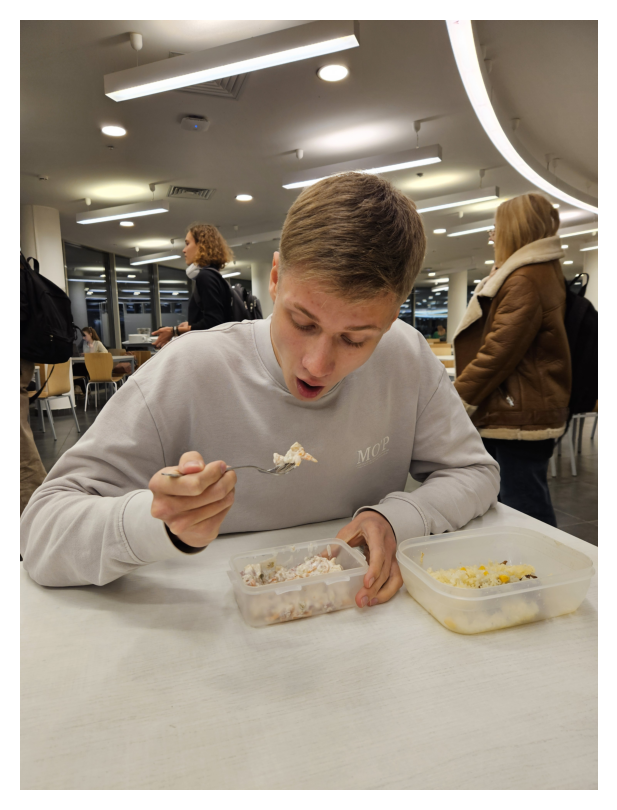

In [ ]:
from PIL import Image

image_path = '/content/salad_experience'
image = Image.open(image_path)
rotated_image = image.rotate(-90, expand=True)
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

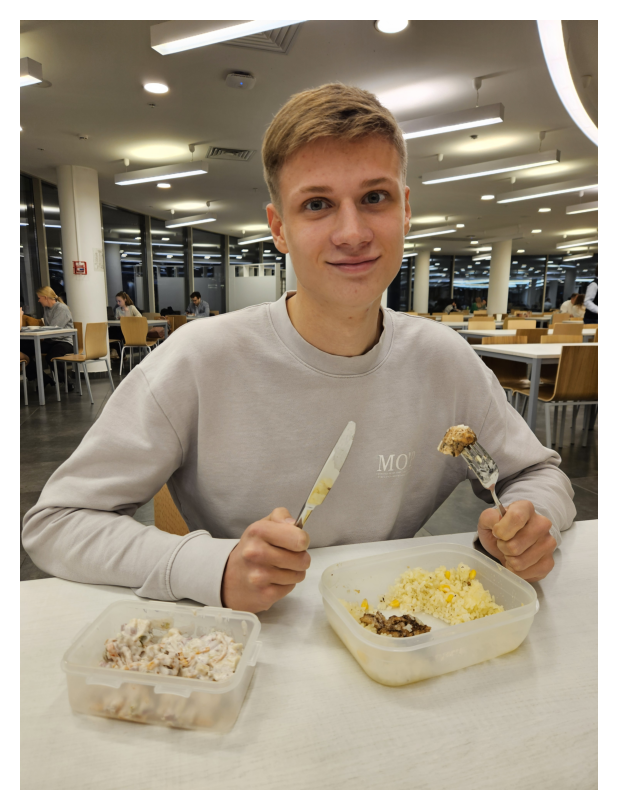

In [ ]:
from PIL import Image

image_path = '/content/steak_experience'
image = Image.open(image_path)
rotated_image = image.rotate(-90, expand=True)
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: